### **Overall Project Goals:**

Market analysis understanding property preferences, and exploring the impact of location and amenities on rental properties in the UK.

**Potential Questions:**
- Which 10 subdistricts have the most property listings to rent?
- Which 10 subdistricts have?
- How do rent prices vary  in each sub district?
- What is the median rent price per person (overall/per subdistrict)
- How does the deposit vary with the rent price?
- What are the proportions of furnished, unfurnished and semi-furnished properties?
- How does the rent price vary based on the furnish type?
- How does number of bedrooms  affect the rent prices?
- What is the average commute distance to the nearest train station?
- How do rent prices vary across different property types?


### **Data**
The dataset was imported from the London Property Rental Dataset found on Kaggle. This dataset provides comprehensive information about rental properties in the UK, sourced from the popular real estate platform Rightmove. It includes details such as address, subdistrict code, rental price, deposit amount, letting type, furnish type, council tax information, property type, number of bedrooms and bathrooms, size in square feet, average distance to the nearest train station, and the count of nearest stations.

### **Analysis**
Descriptive statistics and data visualization techniques will be employed to understand the data better. Statistical inference may also be used to test if the observed values are statistically significant. Some of the key metrics that will be computed include:

1. Distributions
1. Counts
1. Descriptive statistics of variables
1. Relationship between variables

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
# Linking with google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### **Exploring the dataset**

Iniital exploration to get a feel for the data

In [ ]:
# Importing dataset
df = pd.read_csv('/content/gdrive/My Drive/Imran/Education/PersonalDevelopment/CodeCademy-DataScience/PortfolioProjects/CapstoneProject/rent_ads_rightmove_extended.csv')

In [ ]:
# Getting a feel for the overall dataset
df.head()

,address,subdistrict_code,rent,deposit,Let type,Furnish Type,Coucil Tax,PROPERTY TYPE,BEDROOMS,BATHROOMS,SIZE,avg_distance_to_nearest_station,nearest_station_count
0,"Morse Close, Harefield, UB9",UB9,1200,1384,Long term,Unfurnished,Ask agent,Apartment,1.0,1.0,Ask agent,2.1,3
1,"Dolphin Square, London, SW1V",SW1V,1983,2288,Long term,"Furnished or unfurnished, landlord is flexible",Ask agent,Apartment,1.0,1.0,335 sq ft,0.4,3
2,"Warlters Road, Holloway, London, N7",N7,1800,0,Long term,Unfurnished,Ask agent,Apartment,1.0,1.0,Ask agent,0.5,3
3,"Rockingham Road, Uxbridge",NaN,1650,1903,Long term,Unfurnished,Ask agent,Apartment,2.0,1.0,Ask agent,1.6,3
4,"Northwick Avenue, Harrow, HA3",HA3,2700,3115,Long term,Unfurnished,Ask agent,End of Terrace,3.0,2.0,Ask agent,0.4,3


In [ ]:
# Renaming the columns
df.rename(columns={'Let type': 'let_type', 'Furnish Type': 'furnish_type', 'PROPERTY TYPE': 'property_type', 'BEDROOMS': 'bedrooms',
                   'BATHROOMS': 'bathrooms', 'SIZE': 'size', 'Coucil Tax': 'council_tax'}, inplace=True)

In [ ]:
df.head()

,address,subdistrict_code,rent,deposit,let_type,furnish_type,council_tax,property_type,bedrooms,bathrooms,size,avg_distance_to_nearest_station,nearest_station_count
0,"Morse Close, Harefield, UB9",UB9,1200,1384,Long term,Unfurnished,Ask agent,Apartment,1.0,1.0,Ask agent,2.1,3
1,"Dolphin Square, London, SW1V",SW1V,1983,2288,Long term,"Furnished or unfurnished, landlord is flexible",Ask agent,Apartment,1.0,1.0,335 sq ft,0.4,3
2,"Warlters Road, Holloway, London, N7",N7,1800,0,Long term,Unfurnished,Ask agent,Apartment,1.0,1.0,Ask agent,0.5,3
3,"Rockingham Road, Uxbridge",NaN,1650,1903,Long term,Unfurnished,Ask agent,Apartment,2.0,1.0,Ask agent,1.6,3
4,"Northwick Avenue, Harrow, HA3",HA3,2700,3115,Long term,Unfurnished,Ask agent,End of Terrace,3.0,2.0,Ask agent,0.4,3


In [ ]:
# Determining the number of datapoints and unique addresses
print(f'There are {df.shape[0]} number of datapoints')
print(f'There are {df.address.nunique()} unique addresses')

There are 3478 number of datapoints
There are 2879 unique addresses


There seems to be duplicate addresses. This could mean that within one address, there may be multiple properties for rent.

In [ ]:
# Finding if there are exact duplicates (comparing all columns)
df.duplicated(subset=['address', 'subdistrict_code', 'rent', 'deposit', 'property_type', 'let_type', 'furnish_type', 'council_tax','property_type', 'bedrooms', 'bathrooms', 'size', 'avg_distance_to_nearest_station', 'nearest_station_count']).sum()

0

There does not seem to be exact duplicates. This could indicate that there are multiple properties for rent at the same address. However, it would be better to clean the data first before further exploration.

In [ ]:
# Determining basic statistics for the dataset
df.describe(include='all')

,address,subdistrict_code,rent,deposit,let_type,furnish_type,council_tax,property_type,bedrooms,bathrooms,size,avg_distance_to_nearest_station,nearest_station_count
count,3478,1868,3478.000000,3478.000000,3235,3477,3477,3438,2841.000000,3049.000000,3478,3478.000000,3478.000000
unique,2879,211,NaN,NaN,2,5,3,27,NaN,NaN,543,NaN,NaN
top,"Lexham Gardens, London, W8",E14,NaN,NaN,Long term,Furnished,Ask agent,Flat,NaN,NaN,Ask agent,NaN,NaN
freq,18,202,NaN,NaN,3133,1991,3446,1260,NaN,NaN,2556,NaN,NaN
mean,NaN,NaN,2593.092582,1789.097757,NaN,NaN,NaN,NaN,1.797958,1.431617,NaN,0.494940,2.997412
std,NaN,NaN,2641.117440,2657.305000,NaN,NaN,NaN,NaN,0.916597,0.895819,NaN,0.361535,0.050811
min,NaN,NaN,50.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,0.100000,2.000000
25%,NaN,NaN,1550.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,0.300000,3.000000
50%,NaN,NaN,2275.000000,1038.000000,NaN,NaN,NaN,NaN,2.000000,1.000000,NaN,0.400000,3.000000
75%,NaN,NaN,3250.000000,2825.000000,NaN,NaN,NaN,NaN,2.000000,2.000000,NaN,0.600000,3.000000


Determining each column variable type:
- Address: Categorical
- Subdistrict code: Categorical
- Rent: Quantitative
- Deposit: Quantitative
- Let type: Categorical
- Furnish type: Categorical
- Council tax: Categorical
- Property type: categorical
- Bedrooms: Quantitative
- Bathrooms: Quantitative
- Size: Quantitative
- Avg distance to nearest station: Numerical
- Nearest station count: Categorical

**Columns for initial exploration**
- Rent - £78,000 per month seems quite high
- Deposit - £60,000 deposit seems quite high
- bedrooms - 7 bedroom property is quite large but still possible
- bathrooms - 20 bathroom property seems quite large



In [ ]:
# Finding observation where rent is £78k
df[df.rent == 78000]

,address,subdistrict_code,rent,deposit,let_type,furnish_type,council_tax,property_type,bedrooms,bathrooms,size,avg_distance_to_nearest_station,nearest_station_count
3164,"Princes Gate, London",NaN,78000,0,Long term,Furnished,Ask agent,Terraced,7.0,6.0,Ask agent,0.5,3


As expected, this is a 7 bedroom property in a very high end area. This property can be found in the following link: https://www.zoopla.co.uk/to-rent/details/67111855/

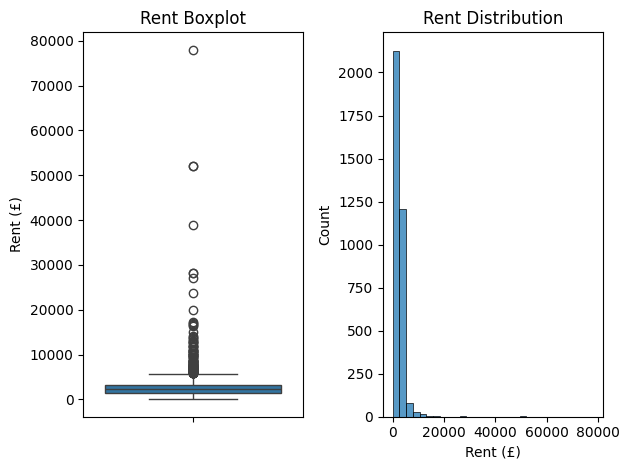

In [ ]:
# Creating a boxplot and plotting a distribution for the rent column values
plt.subplot(1, 2, 1)
sns.boxplot(df.rent)
plt.title('Rent Boxplot')
plt.ylabel('Rent (£)')

plt.subplot(1, 2, 2)
sns.histplot(df.rent, bins=30)
plt.title('Rent Distribution')
plt.xlabel('Rent (£)')

plt.tight_layout()
plt.show()

There are some extreme outliers in the data, but these may be high-end properties in affluent neighbourhoods in London. These values are still possible and hence, should not be removed.

In [ ]:
# Finding observation where deposit is £60k
df[df.deposit == 60000]

,address,subdistrict_code,rent,deposit,let_type,furnish_type,council_tax,property_type,bedrooms,bathrooms,size,avg_distance_to_nearest_station,nearest_station_count
2849,"Palace Gate, Kensington, W8",NaN,52000,60000,Long term,"Furnished or unfurnished, landlord is flexible",Ask agent,Apartment,5.0,5.0,Ask agent,0.5,3


£60,000 deposit for a £52,000 per month, 5 bed and bath property in Kensington is realistic.

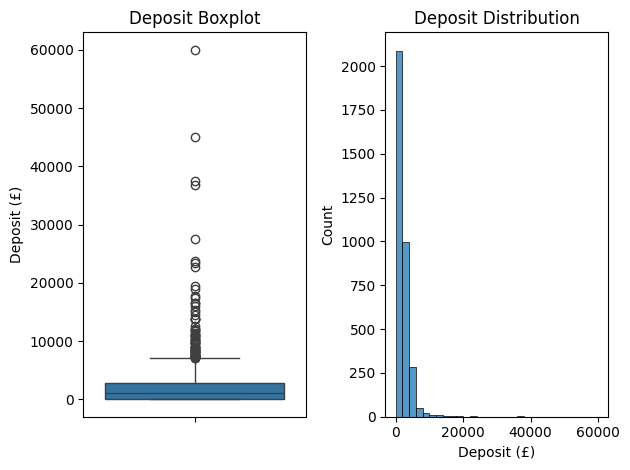

In [ ]:
# Creating a boxplot and plotting a distribution for the deposit column values
plt.subplot(1, 2, 1)
sns.boxplot(df.deposit)
plt.title('Deposit Boxplot')
plt.ylabel('Deposit (£)')

plt.subplot(1, 2, 2)
sns.histplot(df.deposit, bins=30)
plt.title('Deposit Distribution')
plt.xlabel('Deposit (£)')

plt.tight_layout()
plt.show()

Quite a few outliers, but these numbers are still realistic in London depending on the property.

In [ ]:
# Finding observation where the property has 20 bathrooms
df[df.bathrooms == 20]

,address,subdistrict_code,rent,deposit,let_type,furnish_type,council_tax,property_type,bedrooms,bathrooms,size,avg_distance_to_nearest_station,nearest_station_count
111,"Double En-Suite, London, N4",NaN,1500,1500,Long term,Furnished,Ask agent,House Share,1.0,20.0,Ask agent,0.4,3
557,"Double En-Suite, London, N4",NaN,1450,1450,Long term,Furnished,Ask agent,House Share,1.0,20.0,Ask agent,0.4,3
720,"Master En-Suite A, London, N4",NaN,1675,1675,Long term,Furnished,Ask agent,House Share,1.0,20.0,Ask agent,0.4,3


It is a house share property. Considering it is an en-suite based on the address column, the bathrooms should be changed to 1

In [ ]:
# Changing number of bathrooms from 20 to 1
df.loc[df.bathrooms == 20, 'bathrooms'] = 1.0

In [ ]:
df.bathrooms.unique()

array([ 1.,  2., nan,  3.,  4.,  6.,  5.,  8.])

In [ ]:
df.bathrooms.value_counts()

,count
bathrooms,
1.0,2010
2.0,891
3.0,106
4.0,23
5.0,10
6.0,8
8.0,1


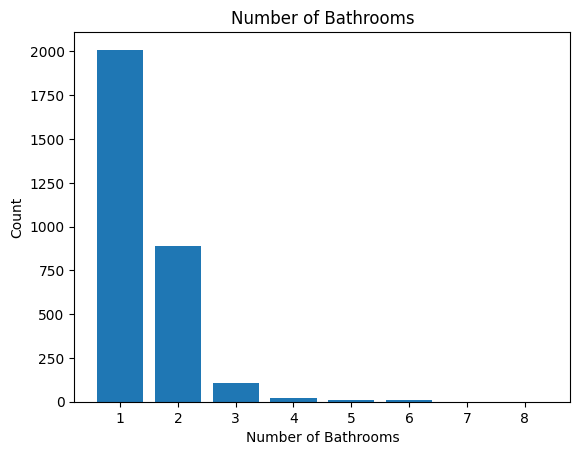

In [ ]:
# Plotting barplot for number of bathrooms
plt.bar([1, 2, 3, 4, 5, 6, 8], df.bathrooms.value_counts())
plt.title('Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')
plt.show()

Most properties have one bathroom

In [ ]:
# Unique values for number of bedrooms
df.bedrooms.unique()

array([ 1.,  2.,  3., nan,  4.,  6.,  5.,  7.])

In [ ]:
df.bedrooms.value_counts()

,count
bedrooms,
1.0,1242
2.0,1141
3.0,313
4.0,98
5.0,32
6.0,12
7.0,3


In [ ]:
# Observations where number of bedrooms = 7
df[df.bedrooms == 7]

,address,subdistrict_code,rent,deposit,let_type,furnish_type,council_tax,property_type,bedrooms,bathrooms,size,avg_distance_to_nearest_station,nearest_station_count
2245,"Watford Way, Hendon, NW4 4TR",NaN,750,865,NaN,Furnished,Ask agent,Semi-Detached,7.0,4.0,Ask agent,1.0,3
2422,"Watford Way, Hendon, NW4 4TR",NaN,850,980,NaN,Furnished,Ask agent,Semi-Detached,7.0,4.0,Ask agent,1.0,3
3164,"Princes Gate, London",NaN,78000,0,Long term,Furnished,Ask agent,Terraced,7.0,6.0,Ask agent,0.5,3


The difference in price is mostly due to the location of the property. The first two are in Hendon, which is in the northern outskirts of London, while Princes gate is close to the centre of London with a lot of amenities around it and is also in an affluent neighbourhood.

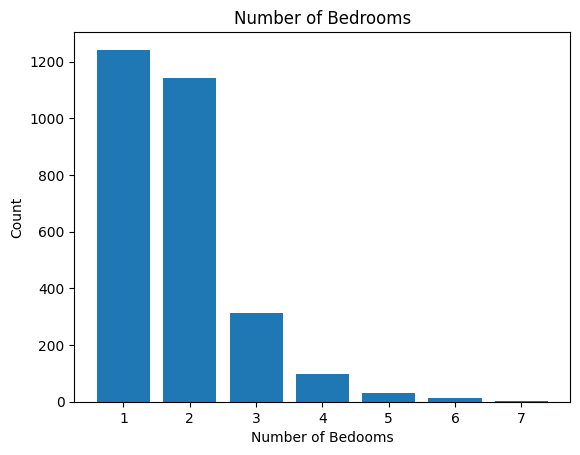

In [ ]:
# Plotting barplot for number of bedrooms
plt.bar([1, 2, 3, 4, 5, 6, 7], df.bedrooms.value_counts())
plt.title('Number of Bedrooms')
plt.xlabel('Number of Bedooms')
plt.ylabel('Count')
plt.show()

Most properties have either one or two bedrooms.

These are good first steps for initial exploration. It might be a good place to start cleaning the data before moving on to further data exploration.

## **Cleaning the Data**

In [ ]:
for column in df:
  print(f'Null values in {column}: {df[column].isnull().sum()}')

Null values in address: 0
Null values in subdistrict_code: 1610
Null values in rent: 0
Null values in deposit: 0
Null values in let_type: 243
Null values in furnish_type: 1
Null values in council_tax: 1
Null values in property_type: 40
Null values in bedrooms: 637
Null values in bathrooms: 429
Null values in size: 0
Null values in avg_distance_to_nearest_station: 0
Null values in nearest_station_count: 0


Quite a few columnns have null values, each of which will be inspected.

**Subdistrict Code**

This column has the most number of missing values (1610)

In [ ]:
df[df.subdistrict_code.isnull()]

,address,subdistrict_code,rent,deposit,let_type,furnish_type,council_tax,property_type,bedrooms,bathrooms,size,avg_distance_to_nearest_station,nearest_station_count
3,"Rockingham Road, Uxbridge",NaN,1650,1903,Long term,Unfurnished,Ask agent,Apartment,2.0,1.0,Ask agent,1.6,3
7,Talbot Square,NaN,2253,0,NaN,Furnished,Ask agent,Studio,NaN,1.0,152 sq ft,0.3,3
8,Phoenix Court Gasholder Place SE11,NaN,2990,3450,Long term,"Furnished or unfurnished, landlord is flexible",Ask agent,Apartment,1.0,1.0,Ask agent,0.5,3
10,Gasholder Place London SE11,NaN,3467,4000,Long term,Furnished,Ask agent,Apartment,2.0,2.0,Ask agent,0.4,3
12,"Falcon Wharf, Battersea Riverside",NaN,3500,4039,Long term,Furnished,Ask agent,Apartment,2.0,2.0,"1,710 sq ft",0.6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3467,"Kensington High Street, London, W8",NaN,4312,5970,Long term,Furnished,Ask agent,Flat,2.0,2.0,Ask agent,0.5,3
3472,"Kensington High Street, High Street Kensington...",NaN,4312,4975,Long term,Furnished,Ask agent,Flat,2.0,2.0,885 sq ft,0.5,3
3473,"Palace Gardens Terrace, Kensington, London, W8",NaN,4312,995,Short term,Ask agent,Ask agent,Flat,1.0,1.0,573 sq ft,0.3,3
3476,"Lexham Gardens, Lexham Gardens",NaN,4333,0,Long term,Furnished,Ask agent,Flat,2.0,1.0,Ask agent,0.4,3


A possible fix would be to extract the subdistrict codes available in the address string and copy the code to the subdistrict code column. This would be able to fix some of the missing values, but there are also some address strings which do not have the subdistrict code.

In [ ]:
# Extracting the subdistrict code in the address column using regex
# Define the extraction function
def extract_subdistrict_code(address):
    pattern = r'\b[A-Z][A-Z0-9]*\d[A-Z0-9]*\b'
    matches = re.findall(pattern, address)
    if matches:
        return matches[-1]
    else:
        return None

# Apply the function to the 'address' column and create a new column 'subdistrict_code'
df['subdistrict_code_new'] = df['address'].apply(extract_subdistrict_code)

# Display the updated DataFrame
df[['address', 'subdistrict_code', 'subdistrict_code_new']].head(20)

,address,subdistrict_code,subdistrict_code_new
0,"Morse Close, Harefield, UB9",UB9,UB9
1,"Dolphin Square, London, SW1V",SW1V,SW1V
2,"Warlters Road, Holloway, London, N7",N7,N7
3,"Rockingham Road, Uxbridge",NaN,None
4,"Northwick Avenue, Harrow, HA3",HA3,HA3
5,"Fitzroy Street, London, W1T",W1T,W1T
6,"Watermans Quay, London, SW6",SW6,SW6
7,Talbot Square,NaN,None
8,Phoenix Court Gasholder Place SE11,NaN,SE11
9,"Barandon Walk, London, W11",W11,W11


In [ ]:
df.subdistrict_code_new.unique()

array(['UB9', 'SW1V', 'N7', None, 'HA3', 'W1T', 'SW6', 'SE11', 'W11',
       'NW6', 'W1H', 'N22', 'WC2E', 'W12', 'TW15', 'W1F', 'SW10', 'NW10',
       'SW3', 'W2', 'W8', 'N1', 'N8', 'W6', 'NW9', 'SW15', 'SW11', 'SW8',
       'W14', 'N2', 'NW3', 'W1G', 'NW8', 'SW1W', 'SE1', 'EN5', 'SW1Y',
       'UB2', 'W9', 'W7', 'SW1', 'W4', 'NW2', 'SW7', 'HA9', 'N4', 'EC2A',
       'N17', 'TW1', 'AL1', 'N14', 'N18', 'N11', 'TW3', 'N5', 'SW1A',
       'WD19', 'E8', 'SL3', 'WC2A', 'N10', 'WC1B', 'N6', 'E5', 'UB7',
       'NW1', 'UB1', 'AL9', 'EC3N', 'HA0', 'SL9', 'EN4', 'WD3', 'SW5',
       'SW12', 'KT2', 'SW1X', 'WD18', 'SL2', 'SW1P', 'SE17', 'N12', 'E1',
       'TW18', 'W10', 'EN6', 'UB6', 'TW8', 'UB5', 'KT1', 'N13', 'UB8',
       'W5', 'SL1', 'UB3', 'W3', 'UB4', 'HA8', 'NW4', 'HA2', 'N19', 'N15',
       'EC1M', 'NW5', 'W1K', 'TW13', 'SW4', 'N3', 'SW18', 'WC2N', 'EC2Y',
       'E2', 'UB10', 'WD25', 'TW10', 'WC2B', 'WC2R', 'EN2', 'WC2H',
       'NW11', 'W13', 'N21', 'NW7', 'W1U', 'EC1V', 'W1W', 'EC4',

In [ ]:
# Manually fixing NW90EU subdistrict code
df.subdistrict_code_new.replace('NW90EU', 'NW9', inplace=True)

In [ ]:
df[df.subdistrict_code_new == 'NW9']

,address,subdistrict_code,rent,deposit,let_type,furnish_type,council_tax,property_type,bedrooms,bathrooms,size,avg_distance_to_nearest_station,nearest_station_count,subdistrict_code_new
35,"Lismore Boulevard, Colindale, London, NW9",NW9,1750,2020,Long term,Unfurnished,Ask agent,Flat,1.0,1.0,482 sq ft,0.8,3,NW9
368,"Cara House,48 Capitol Way, The Northern Quarte...",NW9,2100,2423,Long term,Furnished,Ask agent,Flat,2.0,2.0,Ask agent,0.7,3,NW9
423,"Colindale Gardens, Colindale, London, NW9",NW9,1850,2135,Long term,Unfurnished,Ask agent,Flat,1.0,1.0,532 sq ft,0.7,3,NW9
428,"Moorhen Drive, Hendon, London, NW9",NW9,2500,2885,Long term,Unfurnished,Ask agent,Flat,2.0,2.0,742 sq ft,0.7,3,NW9
429,"Colindale Gardens, Colindale, London, NW9",NW9,1900,2193,Long term,Unfurnished,Ask agent,Flat,1.0,NaN,618 sq ft,0.8,3,NW9
467,"Clayton Field, London, NW9",NW9,1733,0,Long term,"Furnished or unfurnished, landlord is flexible",Ask agent,End of Terrace,3.0,NaN,772 sq ft,0.6,3,NW9
550,"Dara House, London, NW9",NW9,1500,1731,Long term,"Furnished or unfurnished, landlord is flexible",Ask agent,Flat,1.0,1.0,Ask agent,0.7,3,NW9
1000,"Aerodrome Road, Colindale, NW9 4GB – 1 Bedroom...",NaN,2115,2440,Long term,Unfurnished,Ask agent,Flat,1.0,1.0,Ask agent,0.7,3,NW9
2171,"Hundred Acre, London, NW9",NW9,700,0,Short term,Unfurnished,Ask agent,Flat,1.0,1.0,Ask agent,0.7,3,NW9
2305,"Church Lane, London, NW9",NW9,800,0,Long term,Furnished,Ask agent,House Share,NaN,1.0,Ask agent,1.0,3,NW9


In [ ]:
# Filling subdistrict None values with NaN
df.subdistrict_code_new = df.subdistrict_code_new.fillna(value=np.nan)

In [ ]:
# Calculating number of null values per column
for column in df:
  print(f'Null values in {column}: {df[column].isnull().sum()}')

Null values in address: 0
Null values in subdistrict_code: 1610
Null values in rent: 0
Null values in deposit: 0
Null values in let_type: 243
Null values in furnish_type: 1
Null values in council_tax: 1
Null values in property_type: 40
Null values in bedrooms: 637
Null values in bathrooms: 429
Null values in size: 0
Null values in avg_distance_to_nearest_station: 0
Null values in nearest_station_count: 0
Null values in subdistrict_code_new: 657


**Number of Bedrooms**

At first glance, number of bedrooms and bathrooms might be able to be imputed based on other column values

In [ ]:
# Looking at null bedrooms data
df[df.bedrooms.isnull()]

,address,subdistrict_code,rent,deposit,let_type,furnish_type,council_tax,property_type,bedrooms,bathrooms,size,avg_distance_to_nearest_station,nearest_station_count,subdistrict_code_new
7,Talbot Square,NaN,2253,0,NaN,Furnished,Ask agent,Studio,NaN,1.0,152 sq ft,0.3,3,NaN
17,"Uxbridge Road, London, W12",W12,1250,1442,Long term,Furnished,Ask agent,Studio,NaN,1.0,Ask agent,0.2,3,W12
21,"Dolphin Square, London, SW1V",SW1V,2088,2409,Long term,Furnished,Ask agent,Apartment,NaN,1.0,296 sq ft,0.5,3,SW1V
27,"Basil Street, Knightsbridge, London, SW3",SW3,2579,2975,Long term,Furnished,Ask agent,Studio,NaN,1.0,321 sq ft,0.4,3,SW3
57,"Jermyn Street, Piccadilly Circus, London, SW1Y",SW1Y,1950,2250,Long term,Furnished,Ask agent,Studio,NaN,1.0,358 sq ft,0.3,3,SW1Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3348,"Stanhope Gardens, South Kensington, London, SW7",SW7,3943,0,NaN,Furnished,Ask agent,Studio,NaN,1.0,Ask agent,0.3,3,SW7
3350,"Stanhope Gardens, South Kensington, London, SW7",SW7,3944,4550,Long term,Furnished,Ask agent,Studio,NaN,1.0,469 sq ft,0.3,3,SW7
3378,"Club Original, The Other House",NaN,4095,4725,Long term,Furnished,Ask agent,Apartment,NaN,1.0,Ask agent,0.3,3,NaN
3381,Harrington Gardens South Kensington SW7,NaN,4095,4725,Long term,Furnished,Ask agent,Apartment,NaN,1.0,Ask agent,0.3,3,SW7


The type of property could influence the number of bedrooms and bathrooms

In [ ]:
# Determining unique property type values where bedrooms is null
df[df.bedrooms.isnull()].property_type.unique()

array(['Studio', 'Apartment', 'Flat', nan, 'Ground Flat', 'Parking',
       'House Share', 'Garages', 'Flat Share', 'Semi-Detached',
       'Detached', 'House of Multiple Occupation', 'Terraced', 'House',
       'Land', 'Penthouse'], dtype=object)

Some of these property types can determine the number of bedrooms. For example, studios have by default 1 bedroom and 1 bathroom

In [ ]:
# Changing null values in number of bedrooms where property type is studio to 1.0
df.loc[(df.property_type == 'Studio') & (df.bedrooms.isnull()), 'bedrooms'] = 1.0

Parking, Garages and Land property types should not have bedrooms and bathrooms

In [ ]:
# Converting NaN values for bedrooms and bathrooms where property type is Parking, Garages or Land into 0.0
df.loc[((df['property_type'].isin(['Parking', 'Garages', 'Land'])) & (df['bathrooms'].isna())), 'bathrooms'] = 0.0
df.loc[((df['property_type'].isin(['Parking', 'Garages', 'Land'])) & (df['bathrooms'].isna())), 'bathrooms'] = 0.0

In [ ]:
df[df.property_type.isin(['Parking', 'Garages', 'Land']) & df.bedrooms != 0.0]

,address,subdistrict_code,rent,deposit,let_type,furnish_type,council_tax,property_type,bedrooms,bathrooms,size,avg_distance_to_nearest_station,nearest_station_count,subdistrict_code_new
1996,"Parking Space Apartment Vantage Building, UB3",UB3,95,0,Long term,Ask agent,Ask agent,Parking,1.0,1.0,Ask agent,1.4,3,UB3


This particular parking space has a bedroom and bathroom which is unique. It might be a public bed / bathroom. Details for the property can be found below:
https://www.onthemarket.com/details/13504566/

In [ ]:
# Grouping number of null values in bedroom column by property type
df.groupby('property_type')['bedrooms'].apply(lambda x: x.isnull().sum())

,bedrooms
property_type,
Apartment,69
Block of Apartments,0
Bungalow,0
Chalet,0
Cottage,0
Detached,1
Detached Bungalow,0
Duplex,0
End of Terrace,0


This is as far as we can go in determining number of bedrooms and bathrooms from property type

In [ ]:
# Calculating number of null values per column
for column in df:
  print(f'Null values in {column}: {df[column].isnull().sum()}')

Null values in address: 0
Null values in subdistrict_code: 1610
Null values in rent: 0
Null values in deposit: 0
Null values in let_type: 243
Null values in furnish_type: 1
Null values in council_tax: 1
Null values in property_type: 40
Null values in bedrooms: 379
Null values in bathrooms: 314
Null values in size: 0
Null values in avg_distance_to_nearest_station: 0
Null values in nearest_station_count: 0
Null values in subdistrict_code_new: 657


**Council Tax**

This column only has 1 null value, and from initial exploration, does not seems like it has a lot of unique values

In [ ]:
# Determining unique values in council_tax column
df.council_tax.unique()

array(['Ask agent', 'Included', 'Exempt', nan], dtype=object)

In [ ]:
df[df.council_tax.isnull()]

,address,subdistrict_code,rent,deposit,let_type,furnish_type,council_tax,property_type,bedrooms,bathrooms,size,avg_distance_to_nearest_station,nearest_station_count,subdistrict_code_new
2379,"London, London, SW16",SW16,825,1038,NaN,NaN,NaN,Land,NaN,0.0,Ask agent,0.7,3,SW16


This particular observation does not seem to have a lot of useful information. Considering it is just land, there might not even be much interest in renting it. It would be better to just remove this observation

In [ ]:
df = df.drop(index=2379).reset_index(drop=True)

**Furnish Type**


In [ ]:
# Determining unique values in furnish_type column
df.furnish_type.unique()

array(['Unfurnished', 'Furnished or unfurnished, landlord is flexible',
       'Furnished', 'Ask agent', 'Part furnished'], dtype=object)

**Property Type**

In [ ]:
# Finding null values in property_type column
df[df.property_type.isnull()]

,address,subdistrict_code,rent,deposit,let_type,furnish_type,council_tax,property_type,bedrooms,bathrooms,size,avg_distance_to_nearest_station,nearest_station_count,subdistrict_code_new
157,"Ballards Lane, London",NaN,1400,0,Long term,Unfurnished,Ask agent,NaN,NaN,1.0,Ask agent,0.7,3,NaN
217,"Peel Road, Wembley, Greater London, HA9",HA9,875,0,Long term,Furnished,Ask agent,NaN,1.0,NaN,Ask agent,0.2,2,HA9
553,"Emu Road, Battersea, SW8",SW8,2300,2653,Long term,Ask agent,Ask agent,NaN,2.0,1.0,Ask agent,0.4,3,SW8
603,"Brecon Court, Lampton Parkside, TW3",TW3,1950,2308,Long term,Furnished,Ask agent,NaN,2.0,2.0,Ask agent,0.5,3,TW3
628,"Cowdenbeath Path, London, N1",NaN,3550,3250,NaN,Furnished,Ask agent,NaN,4.0,1.0,Ask agent,0.5,3,N1
633,"Cowley Road, Uxbridge, UB8",UB8,850,0,Long term,Part furnished,Ask agent,NaN,1.0,1.0,Ask agent,1.4,3,UB8
882,"Drayton Gardens, London",NaN,4983,0,Long term,Part furnished,Ask agent,NaN,3.0,3.0,Ask agent,0.6,3,NaN
1205,"Aspen, Consort Place, Marsh Wall, E14",E14,4000,4615,Long term,Ask agent,Ask agent,NaN,2.0,2.0,Ask agent,0.1,3,E14
1827,"London Road, 26-28 London Road, Forest Hill",NaN,1200,0,Long term,Furnished,Ask agent,NaN,1.0,1.0,Ask agent,0.6,3,NaN
1901,"Etchingham Road, Leyton, E15",E15,2450,0,Long term,Ask agent,Ask agent,NaN,3.0,1.0,Ask agent,0.5,3,E15


There are 3478 number of datapoints. 5% of 3478 is 174. Considering only 40 properties have NaN property types, and that it is quite difficult to determine the property types without knowing what they actually look like, the observations containing the 40 null property type values can be safely deleted

In [ ]:
# Dropping null property types
df.dropna(subset=['property_type'], inplace=True)

In [ ]:
# Calculating number of null values per column
for column in df:
  print(f'Null values in {column}: {df[column].isnull().sum()}')

Null values in address: 0
Null values in subdistrict_code: 1598
Null values in rent: 0
Null values in deposit: 0
Null values in let_type: 241
Null values in furnish_type: 0
Null values in council_tax: 0
Null values in property_type: 0
Null values in bedrooms: 361
Null values in bathrooms: 296
Null values in size: 0
Null values in avg_distance_to_nearest_station: 0
Null values in nearest_station_count: 0
Null values in subdistrict_code_new: 649


In [ ]:
# Selecting observations where let_type is null
df[df.let_type.isnull()]

,address,subdistrict_code,rent,deposit,let_type,furnish_type,council_tax,property_type,bedrooms,bathrooms,size,avg_distance_to_nearest_station,nearest_station_count,subdistrict_code_new
7,Talbot Square,NaN,2253,0,NaN,Furnished,Ask agent,Studio,1.0,1.0,152 sq ft,0.3,3,NaN
25,"Xchange Point, Market Road, Islington, N7",NaN,2150,2480,NaN,"Furnished or unfurnished, landlord is flexible",Ask agent,Apartment,1.0,1.0,531 sq ft,0.3,3,N7
101,"Grange Grove, London",NaN,2499,2884,NaN,Furnished,Ask agent,Ground Flat,2.0,1.0,Ask agent,0.3,3,NaN
105,"Elmfield Way, London",NaN,2300,2654,NaN,Furnished,Ask agent,Apartment,3.0,1.0,787 sq ft,0.4,3,NaN
106,Station Road New Barnet,NaN,1700,0,NaN,Unfurnished,Ask agent,Flat,1.0,1.0,549 sq ft,0.6,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3347,"Stanhope Gardens, South Kensington, London, SW7",SW7,3943,0,NaN,Furnished,Ask agent,Studio,1.0,1.0,Ask agent,0.3,3,SW7
3354,"Cluny Mews, London, SW5 9AG",NaN,4000,0,NaN,Furnished,Ask agent,Flat,1.0,1.0,603 sq ft,0.3,3,SW5
3374,"116 Cromwell Road, Kensington, London, SW7",SW7,4052,4675,NaN,Furnished,Ask agent,Apartment,2.0,2.0,Ask agent,0.3,3,SW7
3437,Two Bedroom Apartment Available to Let - Kensi...,NaN,4160,4160,NaN,Furnished,Ask agent,Flat,2.0,2.0,Ask agent,0.4,3,NaN


In [ ]:
# Finding let_type unique values
df.let_type.unique()

array(['Long term', nan, 'Short term'], dtype=object)

Let type can only either be long term or short term. We cannot determine whether a property is available for short or long term let unless we contact the agent or find the listing individually.

**Iterative imputer**

We can try using the iterative imputer to determine the number of bedrooms and bathrooms of NaN values from the different variables

In [ ]:
# Using SKLearn iterative imputer to determine remaining NaN values of bedroom and bathroom
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder

# Preserve the original index
original_index = df.index

# Convert categorical columns to numerical using one-hot encoding
categorical_cols = ['let_type', 'furnish_type', 'council_tax', 'property_type']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Replace 'Ask agent' in 'size' with NaN and convert to float
df_encoded['size'] = df_encoded['size'].replace('Ask agent', np.nan)
df_encoded['size'] = df_encoded['size'].str.extract('(\d+)').astype(float)

# Drop columns that are not required for imputation
df_encoded.drop(columns=['address', 'subdistrict_code', 'subdistrict_code_new'], inplace=True, errors='ignore')

# Apply the Iterative Imputer
imputer = IterativeImputer(random_state=0)
df_imputed = pd.DataFrame(imputer.fit_transform(df_encoded), columns=df_encoded.columns)

# Ensure index alignment
df_imputed.index = original_index

# Round bedrooms and bathrooms to nearest integer
df_imputed['bedrooms'] = np.round(df_imputed['bedrooms'])
df_imputed['bathrooms'] = np.round(df_imputed['bathrooms'])

# Reassign the imputed values to the original DataFrame
df[['bedrooms', 'bathrooms']] = df_imputed[['bedrooms', 'bathrooms']]

In [ ]:
df.shape

(3437, 14)

In [ ]:
# Calculating number of null values per column
for column in df:
  print(f'Null values in {column}: {df[column].isnull().sum()}')

Null values in address: 0
Null values in subdistrict_code: 1598
Null values in rent: 0
Null values in deposit: 0
Null values in let_type: 241
Null values in furnish_type: 0
Null values in council_tax: 0
Null values in property_type: 0
Null values in bedrooms: 0
Null values in bathrooms: 0
Null values in size: 0
Null values in avg_distance_to_nearest_station: 0
Null values in nearest_station_count: 0
Null values in subdistrict_code_new: 649


**Dropping Exact Duplicates**

In [ ]:
# Finding if there are exact duplicates (comparing all columns)
df[df.duplicated(subset=['address', 'subdistrict_code_new', 'rent', 'deposit', 'property_type', 'let_type', 'furnish_type', 'council_tax','property_type', 'bedrooms', 'bathrooms', 'size', 'avg_distance_to_nearest_station', 'nearest_station_count'])]

,address,subdistrict_code,rent,deposit,let_type,furnish_type,council_tax,property_type,bedrooms,bathrooms,size,avg_distance_to_nearest_station,nearest_station_count,subdistrict_code_new
2830,"Penywern Road, LONDON",NaN,2275,0,Long term,Ask agent,Ask agent,Apartment,1.0,1.0,Ask agent,0.3,3,NaN


In [ ]:
# Dropping exact duplicates
df.drop_duplicates(subset=['address', 'subdistrict_code_new', 'rent', 'deposit', 'property_type', 'let_type', 'furnish_type', 'council_tax','property_type', 'bedrooms', 'bathrooms', 'size', 'avg_distance_to_nearest_station', 'nearest_station_count'], inplace=True)

**Property Size**

In [ ]:
df[df['size'] == 'Ask agent']

,address,subdistrict_code,rent,deposit,let_type,furnish_type,council_tax,property_type,bedrooms,bathrooms,size,avg_distance_to_nearest_station,nearest_station_count,subdistrict_code_new
0,"Morse Close, Harefield, UB9",UB9,1200,1384,Long term,Unfurnished,Ask agent,Apartment,1.0,1.0,Ask agent,2.1,3,UB9
2,"Warlters Road, Holloway, London, N7",N7,1800,0,Long term,Unfurnished,Ask agent,Apartment,1.0,1.0,Ask agent,0.5,3,N7
3,"Rockingham Road, Uxbridge",NaN,1650,1903,Long term,Unfurnished,Ask agent,Apartment,2.0,1.0,Ask agent,1.6,3,NaN
4,"Northwick Avenue, Harrow, HA3",HA3,2700,3115,Long term,Unfurnished,Ask agent,End of Terrace,3.0,2.0,Ask agent,0.4,3,HA3
5,"Fitzroy Street, London, W1T",W1T,3500,3500,Long term,Furnished,Ask agent,Flat,2.0,1.0,Ask agent,0.2,3,W1T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3466,"Kensington High Street, London, W8",NaN,4312,5970,Long term,Furnished,Ask agent,Flat,2.0,2.0,Ask agent,0.5,3,W8
3467,"Queens Gate, South Kensington, SW7",SW7,4312,4249,Long term,Furnished,Ask agent,Flat,1.0,1.0,Ask agent,0.5,3,SW7
3468,"Brompton Road, Knightsbridge , London, SW3",SW3,4312,5970,NaN,Furnished,Ask agent,Apartment,2.0,1.0,Ask agent,0.4,3,SW3
3475,"Lexham Gardens, Lexham Gardens",NaN,4333,0,Long term,Furnished,Ask agent,Flat,2.0,1.0,Ask agent,0.4,3,NaN


2493 observations (73%) out of 3395 have the "Ask agent" label for its size. It would be unwise to try and estimate these values. It would be better to drop the column entirely.

In [ ]:
df.drop(columns=['size'], inplace=True)

In [ ]:
df.head()

,address,subdistrict_code,rent,deposit,let_type,furnish_type,council_tax,property_type,bedrooms,bathrooms,avg_distance_to_nearest_station,nearest_station_count,subdistrict_code_new
0,"Morse Close, Harefield, UB9",UB9,1200,1384,Long term,Unfurnished,Ask agent,Apartment,1.0,1.0,2.1,3,UB9
1,"Dolphin Square, London, SW1V",SW1V,1983,2288,Long term,"Furnished or unfurnished, landlord is flexible",Ask agent,Apartment,1.0,1.0,0.4,3,SW1V
2,"Warlters Road, Holloway, London, N7",N7,1800,0,Long term,Unfurnished,Ask agent,Apartment,1.0,1.0,0.5,3,N7
3,"Rockingham Road, Uxbridge",NaN,1650,1903,Long term,Unfurnished,Ask agent,Apartment,2.0,1.0,1.6,3,NaN
4,"Northwick Avenue, Harrow, HA3",HA3,2700,3115,Long term,Unfurnished,Ask agent,End of Terrace,3.0,2.0,0.4,3,HA3


In [ ]:
# Exporting current data to csv for manual subdistrict code entry
# df.to_csv('/content/gdrive/My Drive/Imran/Education/PersonalDevelopment/CodeCademy-DataScience/PortfolioProjects/CapstoneProject/rent_ads_rightmove_extended_clean_v2.csv', index=False)

# =========

In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/Imran/Education/PersonalDevelopment/CodeCademy-DataScience/PortfolioProjects/CapstoneProject/rent_ads_rightmove_extended_clean_final.csv')

The missing subdistrict codes were manually added. The remaining null values were due to the addresses not having enough information.

In [ ]:
df.head()

,address,subdistrict_code,rent,deposit,let_type,furnish_type,council_tax,property_type,bedrooms,bathrooms,avg_distance_to_nearest_station,nearest_station_count,subdistrict_code_new
0,"Morse Close, Harefield, UB9",UB9,1200,1384,Long term,Unfurnished,Ask agent,Apartment,1,1,2.1,3,UB9
1,"Dolphin Square, London, SW1V",SW1V,1983,2288,Long term,"Furnished or unfurnished, landlord is flexible",Ask agent,Apartment,1,1,0.4,3,SW1V
2,"Warlters Road, Holloway, London, N7",N7,1800,0,Long term,Unfurnished,Ask agent,Apartment,1,1,0.5,3,N7
3,"Rockingham Road, Uxbridge",NaN,1650,1903,Long term,Unfurnished,Ask agent,Apartment,2,1,1.6,3,UB8
4,"Northwick Avenue, Harrow, HA3",HA3,2700,3115,Long term,Unfurnished,Ask agent,End of Terrace,3,2,0.4,3,HA3


In [ ]:
# Calculating number of null values per column
for column in df:
  print(f'Null values in {column}: {df[column].isnull().sum()}')

Null values in address: 0
Null values in subdistrict_code: 1597
Null values in rent: 0
Null values in deposit: 0
Null values in let_type: 241
Null values in furnish_type: 0
Null values in council_tax: 0
Null values in property_type: 0
Null values in bedrooms: 0
Null values in bathrooms: 0
Null values in avg_distance_to_nearest_station: 0
Null values in nearest_station_count: 0
Null values in subdistrict_code_new: 9


In [ ]:
# Calculating percentage of null values per column
for column in df:
  print(f'Null values in {column}: {round(df[column].isnull().sum() / df.shape[0] * 100, 2)}%')

Null values in address: 0.0%
Null values in subdistrict_code: 46.48%
Null values in rent: 0.0%
Null values in deposit: 0.0%
Null values in let_type: 7.01%
Null values in furnish_type: 0.0%
Null values in council_tax: 0.0%
Null values in property_type: 0.0%
Null values in bedrooms: 0.0%
Null values in bathrooms: 0.0%
Null values in avg_distance_to_nearest_station: 0.0%
Null values in nearest_station_count: 0.0%
Null values in subdistrict_code_new: 0.26%


There are still 238 missing values for the Let Type column. We could assume that these properties allow for both types. Hence, we will convert the NaN values in let_type to "Short or Long Term".

In [ ]:
# Convert missing values in let_type column to "Short or Long Term"
df['let_type'].fillna('Short or Long Term', inplace=True)

In [ ]:
df.let_type.unique()

array(['Long term', 'Short or Long Term', 'Short term'], dtype=object)

In [ ]:
# Calculating number of null values per column
for column in df:
  print(f'Null values in {column}: {df[column].isnull().sum()}')

Null values in address: 0
Null values in subdistrict_code: 1597
Null values in rent: 0
Null values in deposit: 0
Null values in let_type: 0
Null values in furnish_type: 0
Null values in council_tax: 0
Null values in property_type: 0
Null values in bedrooms: 0
Null values in bathrooms: 0
Null values in avg_distance_to_nearest_station: 0
Null values in nearest_station_count: 0
Null values in subdistrict_code_new: 9


**Cleaning the address column**

In [ ]:
# Stripping Extra Whitespace in address column
df['address'] = df['address'].str.strip()

In [ ]:
# Checking for entries that don't start with a letter
df[~df['address'].str.match(r'^[a-zA-Z0-9]')]

,address,subdistrict_code,rent,deposit,let_type,furnish_type,council_tax,property_type,bedrooms,bathrooms,avg_distance_to_nearest_station,nearest_station_count,subdistrict_code_new
1794,", FALCONBROOK GARDENS, Canning Town, London, E16",E16,2400,2770,Long term,Furnished,Ask agent,Flat,1,1,0.3,3,E16
2425,"(First Floor Back Room) 118 Robinson Road, London",NaN,850,0,Short or Long Term,Ask agent,Ask agent,House Share,1,1,0.4,3,SW17
2647,", Elsham Road, London, W14",W14,1750,2019,Long term,Furnished,Ask agent,Studio,1,1,0.4,3,W14


In [ ]:
# Removing comma and whitespace from start of filtered entries
df['address'] = df['address'].str.lstrip(', ')

In [ ]:
# Checking for entries that don't start with a letter
df[~df['address'].str.match(r'^[a-zA-Z0-9]')]

,address,subdistrict_code,rent,deposit,let_type,furnish_type,council_tax,property_type,bedrooms,bathrooms,avg_distance_to_nearest_station,nearest_station_count,subdistrict_code_new
2425,"(First Floor Back Room) 118 Robinson Road, London",NaN,850,0,Short or Long Term,Ask agent,Ask agent,House Share,1,1,0.4,3,SW17


**We can now move forward to exploring the data**

## **Exploratory Data Analysis**


In [ ]:
df.head()

,address,subdistrict_code,rent,deposit,let_type,furnish_type,council_tax,property_type,bedrooms,bathrooms,avg_distance_to_nearest_station,nearest_station_count,subdistrict_code_new
0,"Morse Close, Harefield, UB9",UB9,1200,1384,Long term,Unfurnished,Ask agent,Apartment,1,1,2.1,3,UB9
1,"Dolphin Square, London, SW1V",SW1V,1983,2288,Long term,"Furnished or unfurnished, landlord is flexible",Ask agent,Apartment,1,1,0.4,3,SW1V
2,"Warlters Road, Holloway, London, N7",N7,1800,0,Long term,Unfurnished,Ask agent,Apartment,1,1,0.5,3,N7
3,"Rockingham Road, Uxbridge",NaN,1650,1903,Long term,Unfurnished,Ask agent,Apartment,2,1,1.6,3,UB8
4,"Northwick Avenue, Harrow, HA3",HA3,2700,3115,Long term,Unfurnished,Ask agent,End of Terrace,3,2,0.4,3,HA3


In [ ]:
# Getting descriptive statistics for all columns
df.describe(include='all')

,address,subdistrict_code,rent,deposit,let_type,furnish_type,council_tax,property_type,bedrooms,bathrooms,avg_distance_to_nearest_station,nearest_station_count,subdistrict_code_new
count,3436,1839,3436.000000,3436.000000,3436,3436,3436,3436,3436.000000,3436.000000,3436.000000,3436.000000,3427
unique,2845,211,NaN,NaN,3,5,3,26,NaN,NaN,NaN,NaN,246
top,"Lexham Gardens, London, W8",E14,NaN,NaN,Long term,Furnished,Ask agent,Flat,NaN,NaN,NaN,NaN,E14
freq,18,198,NaN,NaN,3093,1969,3405,1260,NaN,NaN,NaN,NaN,280
mean,NaN,NaN,2608.295984,1803.556170,NaN,NaN,NaN,NaN,1.653667,1.365541,0.495314,2.997963,NaN
std,NaN,NaN,2650.681107,2667.256989,NaN,NaN,NaN,NaN,0.898302,0.700360,0.362851,0.045096,NaN
min,NaN,NaN,50.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.100000,2.000000,NaN
25%,NaN,NaN,1560.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.300000,3.000000,NaN
50%,NaN,NaN,2297.000000,1045.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.400000,3.000000,NaN
75%,NaN,NaN,3250.000000,2826.000000,NaN,NaN,NaN,NaN,2.000000,2.000000,0.600000,3.000000,NaN


Lexham Gardens seems to be the top property being listed, while E14 seems to have the most properties available for rent.

In [ ]:
df.info() # Datatypes seem correct

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3436 entries, 0 to 3435
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   address                          3436 non-null   object 
 1   subdistrict_code                 1839 non-null   object 
 2   rent                             3436 non-null   int64  
 3   deposit                          3436 non-null   int64  
 4   let_type                         3436 non-null   object 
 5   furnish_type                     3436 non-null   object 
 6   council_tax                      3436 non-null   object 
 7   property_type                    3436 non-null   object 
 8   bedrooms                         3436 non-null   int64  
 9   bathrooms                        3436 non-null   int64  
 10  avg_distance_to_nearest_station  3436 non-null   float64
 11  nearest_station_count            3436 non-null   int64  
 12  subdistrict_code_new

**Which subdistricts have the most listings?**

In [ ]:
# Determining number of unique subdistricts
df.subdistrict_code_new.nunique()

246

In [ ]:
# Finding top 10 subdistrict with most properties available for rent
top10_subdistricts = df.subdistrict_code_new.value_counts().head(10).reset_index()
top10_subdistricts


,subdistrict_code_new,count
0,E14,280
1,W8,280
2,SW5,273
3,SW7,235
4,W14,150
5,E1,100
6,SE1,83
7,E16,65
8,E3,55
9,SE16,51


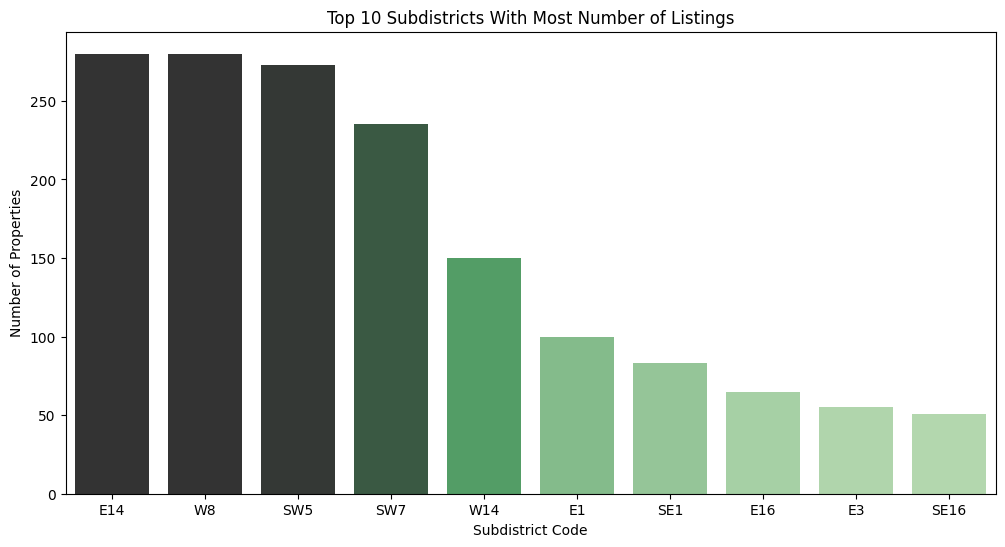

In [ ]:
# Plotting top 10 sub districts with most properties to rent
plt.figure(figsize=(12, 6))
sns.barplot(x='subdistrict_code_new', y='count', hue='count', palette="Greens_d", legend=False, data=top10_subdistricts)
plt.xlabel('Subdistrict Code')
plt.ylabel('Number of Properties')
plt.title('Top 10 Subdistricts With Most Number of Listings')
plt.show()

E14 and W8 have the same number of listings (280), followed by SW5 (273) and SW7 (235). There is then a steep drop in the following subdistricts, followed by a plateau in listings around 35-40.

**Exploring Rent Prices**

In [ ]:
# Overall mean rent price
print(f'Overall mean rent price: £{round(df.rent.mean(), 2)}')

Overall mean rent price: £2608.3


In [ ]:
# Median rent price
print(f'Overall median rent price: £{round(df.rent.median(), 2)}')

Overall median rent price: £2297.0


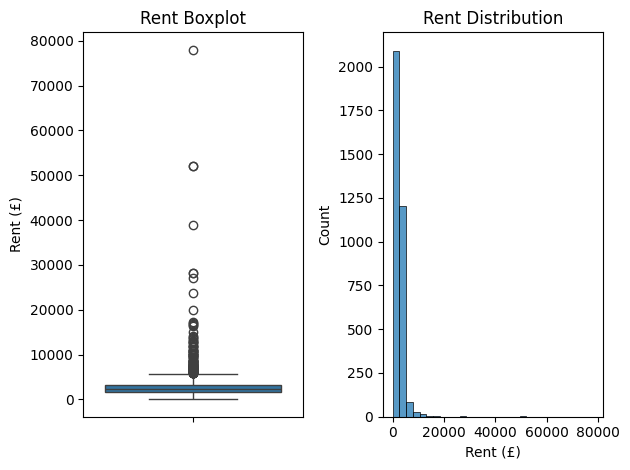

In [ ]:
# Creating a boxplot and plotting a distribution for the rent column values

plt.subplot(1, 2, 1)
sns.boxplot(df.rent)
plt.title('Rent Boxplot')
plt.ylabel('Rent (£)')

plt.subplot(1, 2, 2)
sns.histplot(df.rent, bins=30)
plt.title('Rent Distribution')
plt.xlabel('Rent (£)')

plt.tight_layout()
plt.show()

As seen in the plot above, rent in London can get really expensive despite an average rent price of £2600. This analysis focuses on what factors affect the rent prices.

The mean is higher than the median due to the presence of outliers pulling the average value higher. It would make more sense to use median value when working the prices to account for these outliers.

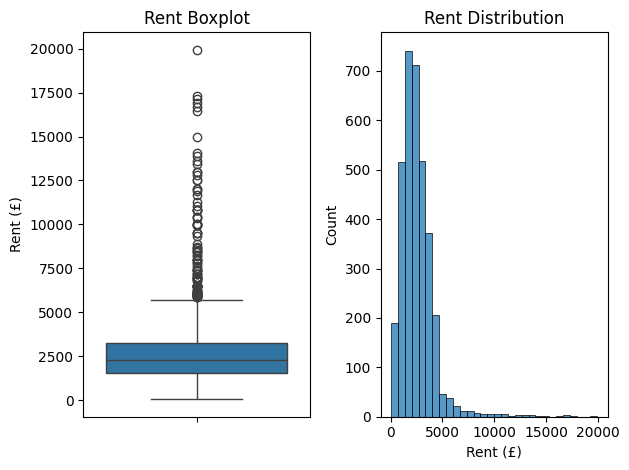

In [ ]:
# Creating a boxplot and plotting a distribution for the rent column values (Extreme Outliers filtered)

plt.subplot(1, 2, 1)
sns.boxplot(df.rent[df.rent < 20000])
plt.title('Rent Boxplot')
plt.ylabel('Rent (£)')

plt.subplot(1, 2, 2)
sns.histplot(df.rent[df.rent < 20000], bins=30)
plt.title('Rent Distribution')
plt.xlabel('Rent (£)')

plt.tight_layout()
plt.show()

Even with the extreme outliers filtered out, the data is still visibly left-skewed. This could mean that even if most of the properties are priced around £2000-3000 per month, there are still a significant amount of properties that are much more expensive and pull the mean higher.

**Which subdistricts tend to have the most and least expensive properties for rent?**

In [ ]:
# Getting top 10 sub districts with most expensive average rent
top_10_subdistricts_avg_rent = df.groupby('subdistrict_code_new')['rent'].mean().sort_values(ascending=False).head(10).reset_index()
top_10_subdistricts_avg_rent

,subdistrict_code_new,rent
0,W1U,13000.000000
1,SW1X,12642.500000
2,W1K,9348.166667
3,W1F,8248.500000
4,WC1B,8000.000000
5,NW8,7964.150000
6,W1W,7345.000000
7,WC2E,5706.000000
8,W1H,5462.818182
9,WC2A,5320.000000


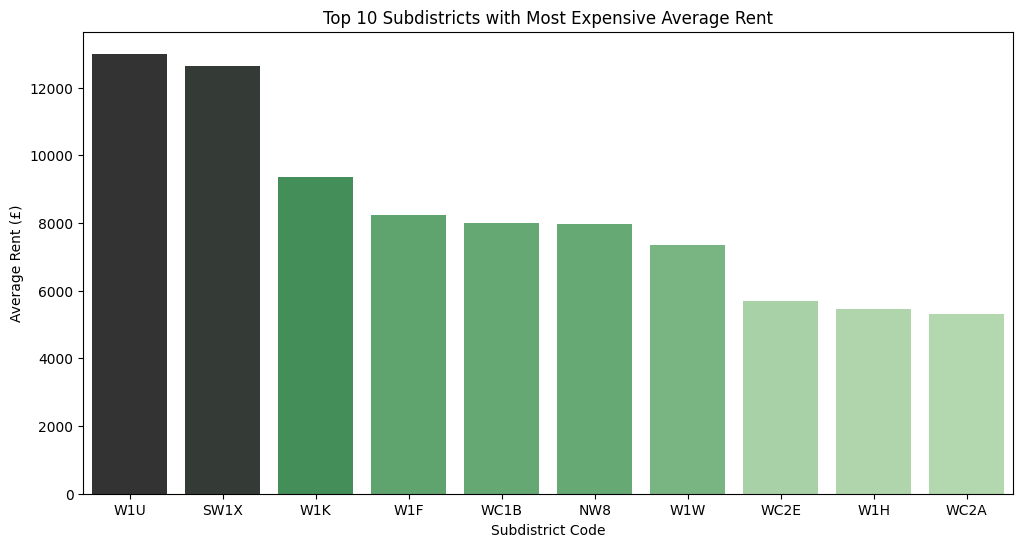

In [ ]:
# Plotting top 10 most expensive sub districts
plt.figure(figsize=(12, 6))
sns.barplot(x='subdistrict_code_new', y='rent', hue='rent', palette="Greens_d", legend=False, data=top_10_subdistricts_avg_rent)
plt.xlabel('Subdistrict Code')
plt.ylabel('Average Rent (£)')
plt.title('Top 10 Subdistricts with Most Expensive Average Rent')
plt.show()

Subdistricts with most properties to rent does not mean they have the most expensive properties.

Due to large variations in rent prices as seen previously, it might be worth looking at median prices as well


In [ ]:
# Getting top 10 sub districts with most expensive average rent
top_10_subdistricts_median_rent = df.groupby('subdistrict_code_new')['rent'].median().sort_values(ascending=False).head(10).reset_index()
top_10_subdistricts_median_rent

,subdistrict_code_new,rent
0,SW1X,13530.5
1,W1U,13000.0
2,W1F,8248.5
3,WC1B,8000.0
4,W1W,7345.0
5,WC2E,6067.0
6,WC2A,5320.0
7,SW1E,5200.0
8,SL9,4990.0
9,SW1W,4984.0


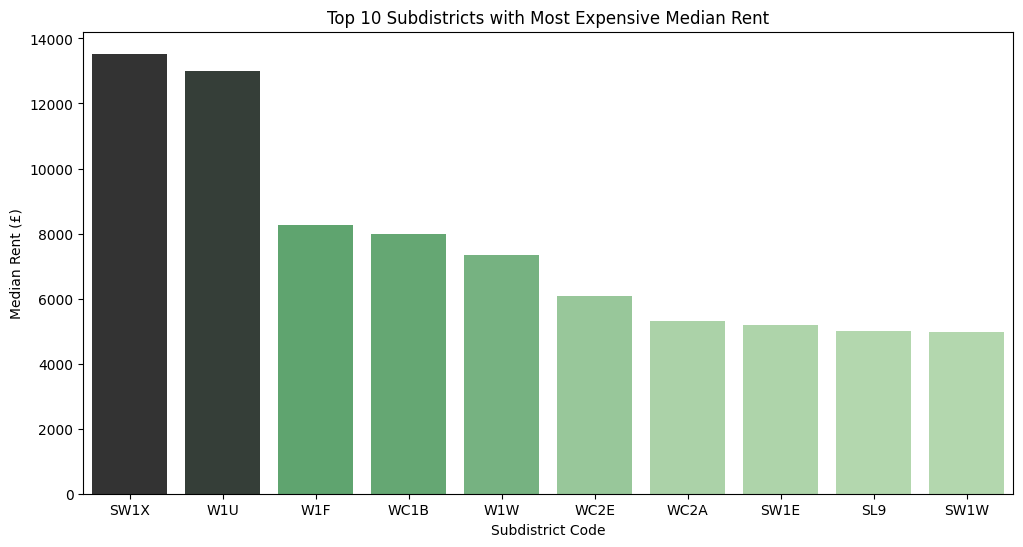

In [ ]:
# Plotting top 10 most expensive sub districts (median)
plt.figure(figsize=(12, 6))
sns.barplot(x='subdistrict_code_new', y='rent', hue='rent', palette="Greens_d", legend=False, data=top_10_subdistricts_median_rent)
plt.xlabel('Subdistrict Code')
plt.ylabel('Median Rent (£)')
plt.title('Top 10 Subdistricts with Most Expensive Median Rent')
plt.show()

There are some changes in the rankings. Notably, SW1X is now the most expensive sub district, followed by W1U. SL9 seems to have made it into the top 10 as well. This is most likely due to the fact that the rent price variations are quite high, skewing the data and thus the mean.

Based on the chart, SW1X and W1U are the most expensive subdistricts, followed by W1F, WC1B and W1W to round up the top 5.

As seen in the charts, most of the top 10 postcodes have the letter 'W', indicating they are in the west side of Greater London. This makes sense as the West and Central areas are some of the most expensive areas of London, alongside several affluent neighbourhoods in the outskirts of London.


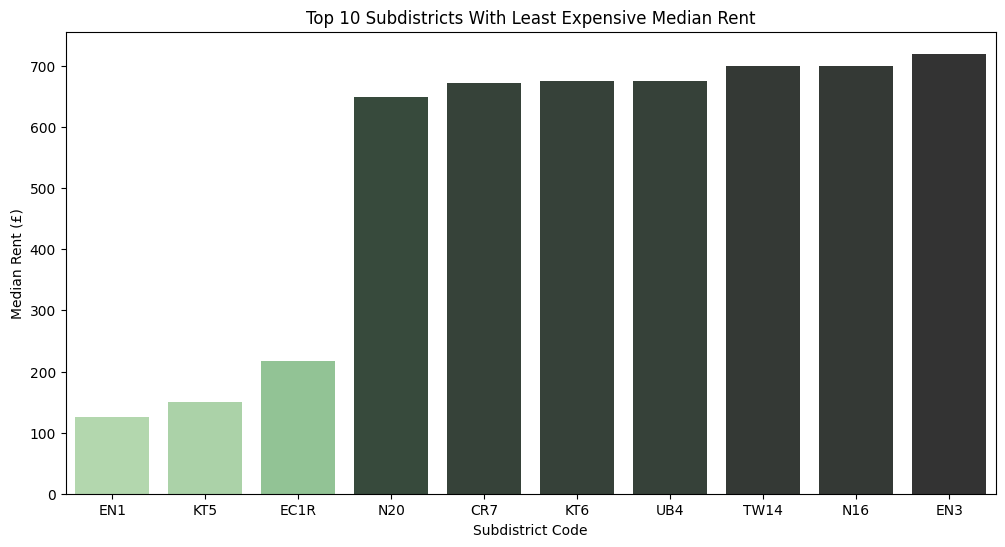

In [ ]:
# Getting top 10 sub districts with least expensive median rent
top_10_subdistricts_median_rent = df.groupby('subdistrict_code_new')['rent'].median().sort_values(ascending=True).head(10).reset_index()
top_10_subdistricts_median_rent

# Plotting the data
plt.figure(figsize=(12, 6))
sns.barplot(x='subdistrict_code_new', y='rent', hue='rent', palette="Greens_d", legend=False, data=top_10_subdistricts_median_rent)
plt.xlabel('Subdistrict Code')
plt.ylabel('Median Rent (£)')
plt.title('Top 10 Subdistricts With Least Expensive Median Rent')
plt.show()

As expected, these mostly consist of areas in the outskirts of London.

**How do rent prices vary in each subdistrict?**

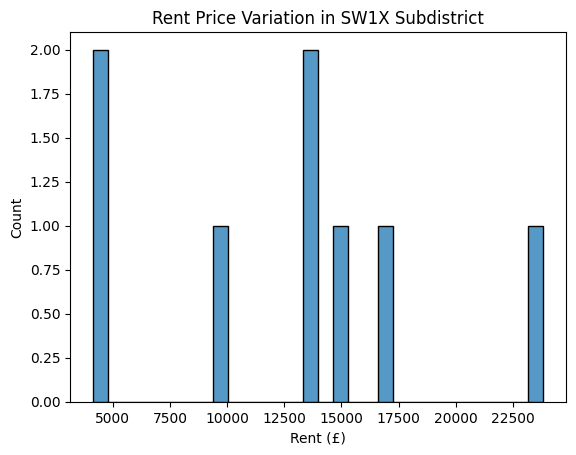

In [ ]:
# Plotting rent price variation in SW1X subdistrict (highest median rent)

rent_sw1x = df[df.subdistrict_code_new == 'SW1X'].rent
sns.histplot(rent_sw1x, bins=30)
plt.title('Rent Price Variation in SW1X Subdistrict')
plt.xlabel('Rent (£)')
plt.show()

There are only six listings available in SW1X, ranging from £5000 to £22500. These prices are quite high compared to the median and mean rent price in London.

Let's take a look at the rent distribution in the E14 subdistrict which has the most property listings.

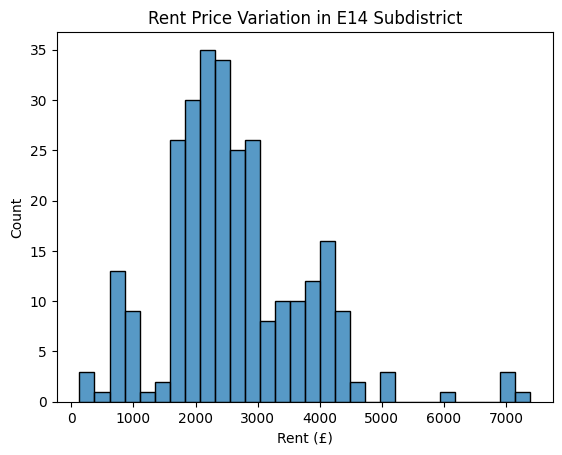

In [ ]:
# Plotting rent price variation in E14 subdistrict (most properties to rent)
rent_e14 = df[df.subdistrict_code_new == 'E14'].rent
sns.histplot(rent_e14, bins=30)
plt.title('Rent Price Variation in E14 Subdistrict')
plt.xlabel('Rent (£)')
plt.show()

A lot of the properties seem to cluster around the £2000-£3000 per month price range in E14, which is close to the mean and median rent prices.

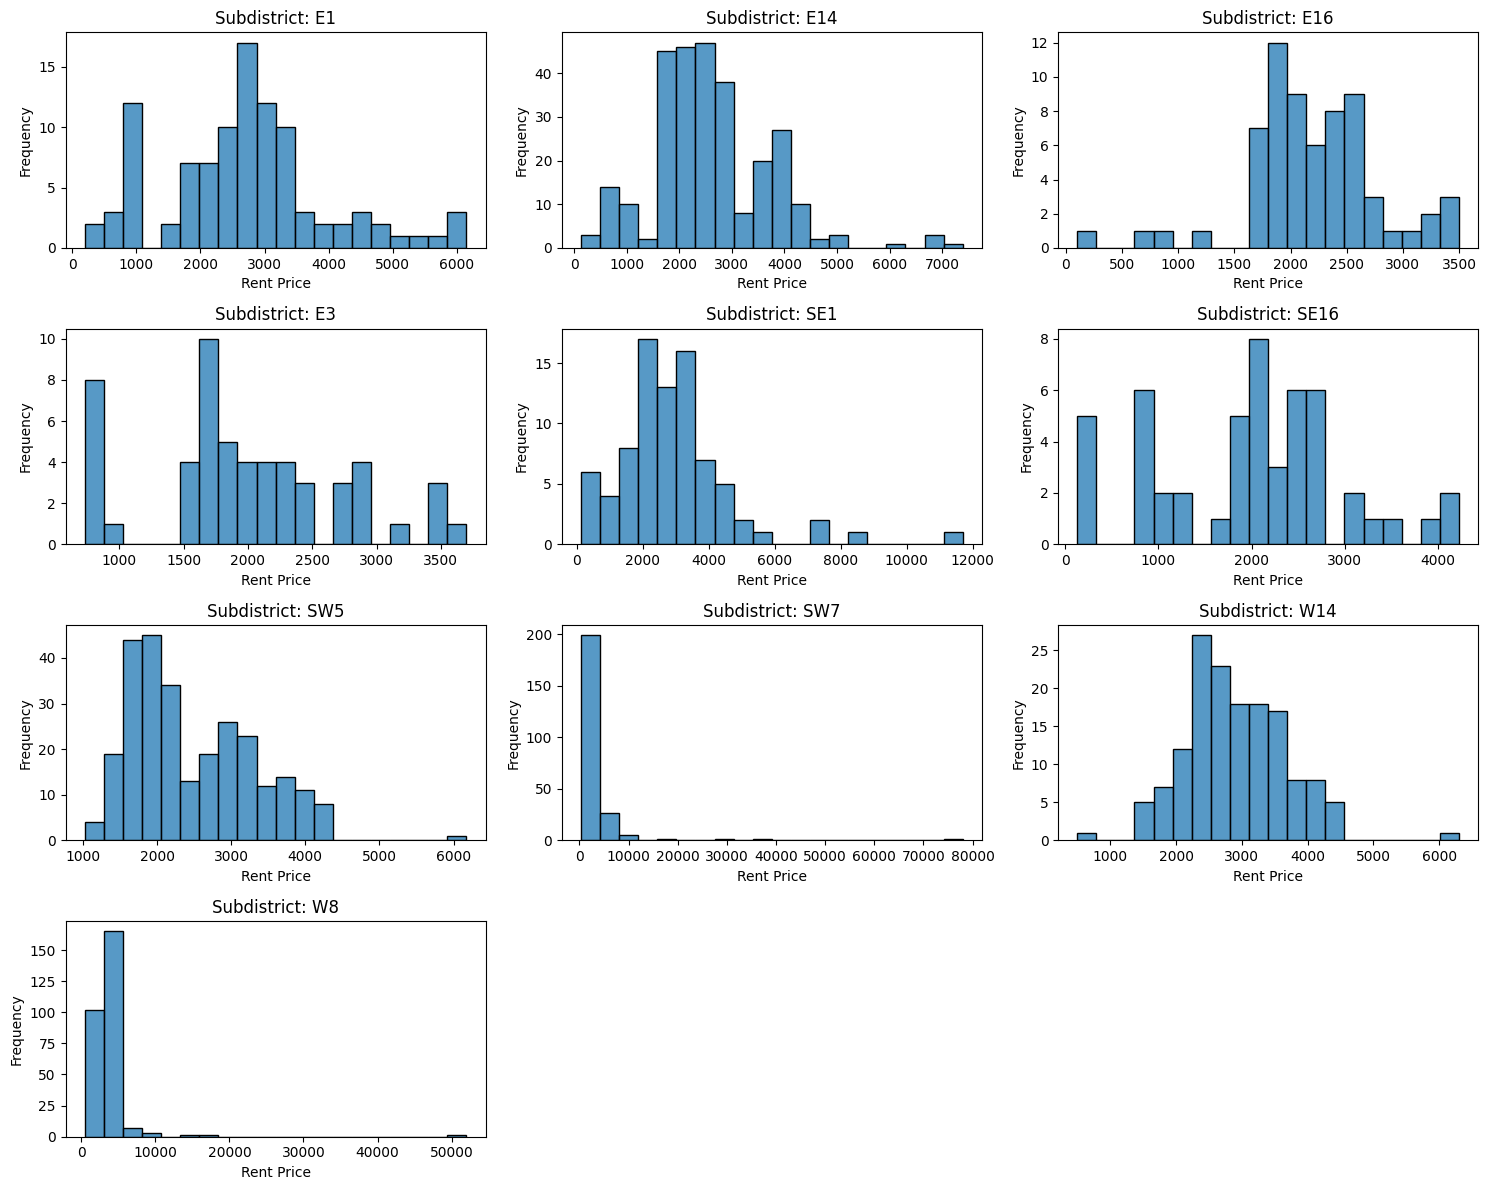

In [ ]:
# Plotting rent price variation in top 10 subdistricts with most properties in subplots

# Filtering df to find data that contains subdistrict code in top20_subdistrict
df_top10 = df[df.subdistrict_code_new.isin(top10_subdistricts.subdistrict_code_new)].reset_index(drop=True)
df_top10.head()

# Plotting 10 subplots
num_subdistricts = df_top10.subdistrict_code_new.nunique()
num_cols = 3 # 3 grid column
num_rows = (num_subdistricts + num_cols - 1) // num_cols

# Create figure
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))

# Flatten the axes array for easy iteration, in case of a single row we use [axes] instead
axes = axes.flatten() if num_rows > 1 else [axes]

# Iterate over each subdistrict and its corresponding subplot
for i, (subdistrict, group) in enumerate(df_top10.groupby('subdistrict_code_new')):
    sns.histplot(group['rent'], ax=axes[i], bins=20)
    axes[i].set_title(f'Subdistrict: {subdistrict}')
    axes[i].set_xlabel('Rent Price')
    axes[i].set_ylabel('Frequency')

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Now we have a feeling of how the rent prices vary between and within the subdistricts. However, each property has a different number of bedrooms, meaning it can fit different number of people. A 2 bedroom flat would be more expensive than a 1 bedroom flat since it can house twice the number of people.

We will now look at how the rent prices divided by number of bedrooms vary

In [ ]:
# Create new column for rent price / bedroom
df['rent_per_bedroom'] = df['rent'] / df['bedrooms']

# Handling infinity values in rent_per_bedroom column (0 bedrooms)
df['rent_per_bedroom'] = df['rent_per_bedroom'].replace([np.inf, -np.inf], np.nan)


In [ ]:
# Calculating the median rent per person
median_rent_per_person = df['rent_per_bedroom'].median()
print(f'The median rent per person is: £{median_rent_per_person}')

The median rent per person is: £1500.0


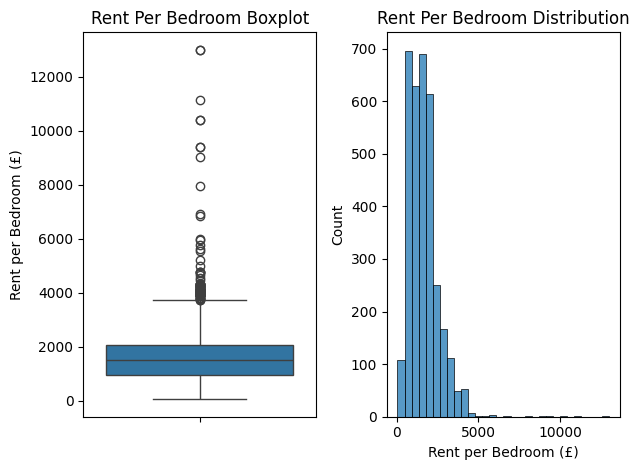

In [ ]:
# Creating a boxplot and plotting a distribution for the rent per bedroom column values

plt.subplot(1, 2, 1)
sns.boxplot(df.rent_per_bedroom)
plt.title('Rent Per Bedroom Boxplot')
plt.ylabel('Rent per Bedroom (£)')

plt.subplot(1, 2, 2)
sns.histplot(df.rent_per_bedroom, bins=30)
plt.title('Rent Per Bedroom Distribution')
plt.xlabel('Rent per Bedroom (£)')

plt.tight_layout()
plt.show()


The shape of the boxplot and distribution are similar to the overall rent prices, but with less variation in price. Now, we can try analyse the top 10 subdistricts with most and least expensive  median rent prices per person.

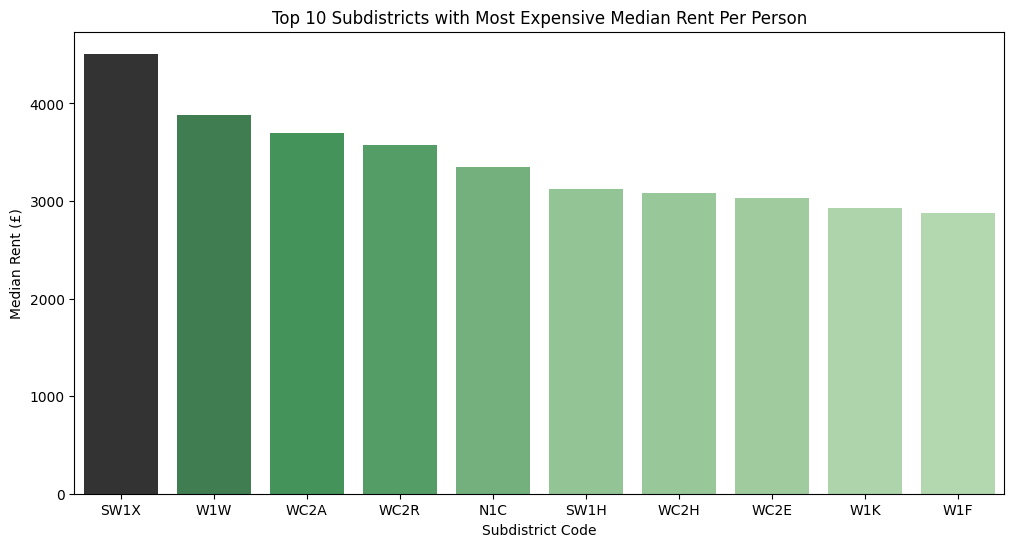

In [ ]:
# Getting top 10 sub districts with most expensive median rent per person
top_10_subdistricts_median_rent = df.groupby('subdistrict_code_new')['rent_per_bedroom'].median().sort_values(ascending=False).head(10).reset_index()
top_10_subdistricts_median_rent

# Plotting top 10 most expensive sub districts for one person
plt.figure(figsize=(12, 6))
sns.barplot(x='subdistrict_code_new', y='rent_per_bedroom', hue='rent_per_bedroom', palette="Greens_d", legend=False, data=top_10_subdistricts_median_rent)
plt.xlabel('Subdistrict Code')
plt.ylabel('Median Rent (£)')
plt.title('Top 10 Subdistricts with Most Expensive Median Rent Per Person')
plt.show()

The rankings are slightly different than overall median rent per subdistrict, although SW1X is still the most expensive subdistrict. The top 10 subdistricts are still mostly dominated by 'W' postcodes. SW1X still remains the most expensive postcode to rent per person.

This could possibly mean that certain subdistricts may have properties that might be cheaper per person but tend to have more bedrooms, giving a more expensive overall rent price, while others may be more expensive per person but tend to have less bedrooms.

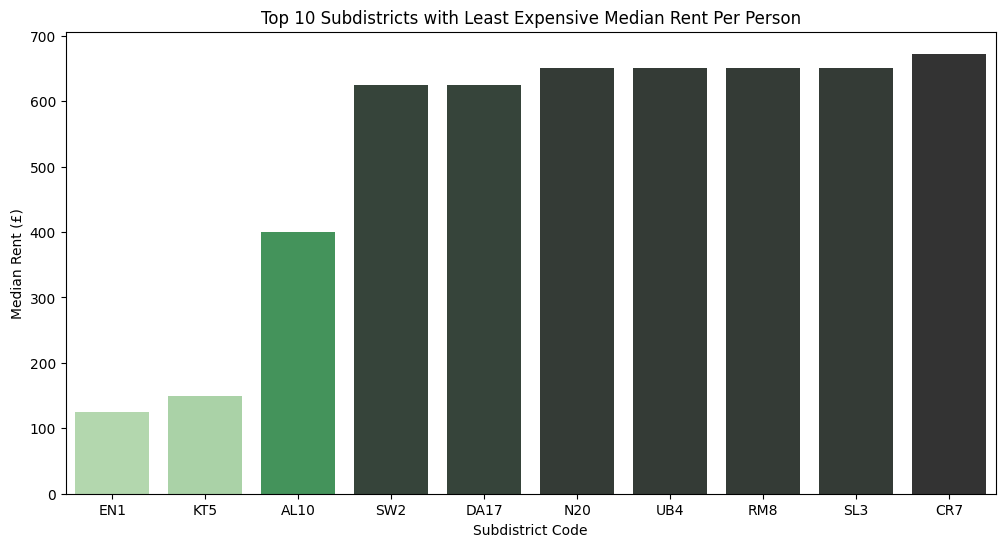

In [ ]:
# Getting top 10 sub districts with least expensive median rent per person
top_10_subdistricts_median_rent = df.groupby('subdistrict_code_new')['rent_per_bedroom'].median().sort_values(ascending=True).head(10).reset_index()
top_10_subdistricts_median_rent

# Plotting the data
plt.figure(figsize=(12, 6))
sns.barplot(x='subdistrict_code_new', y='rent_per_bedroom', hue='rent_per_bedroom', palette="Greens_d", legend=False, data=top_10_subdistricts_median_rent)
plt.xlabel('Subdistrict Code')
plt.ylabel('Median Rent (£)')
plt.title('Top 10 Subdistricts with Least Expensive Median Rent Per Person')
plt.show()

**How Does the Deposit Vary With the Rent Price?**

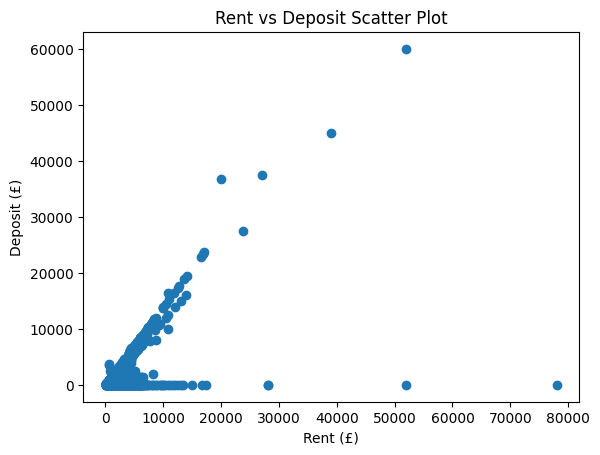

In [ ]:
# Plotting a scatter plot
plt.scatter(df.rent, df.deposit)
plt.xlabel('Rent (£)')
plt.ylabel('Deposit (£)')
plt.title('Rent vs Deposit Scatter Plot')
plt.show()

The scatter plot shows a somewhat linear correlation, but the data is quite messy. It would be beneficial to filter out the messy data to make the visualisation cleaner.

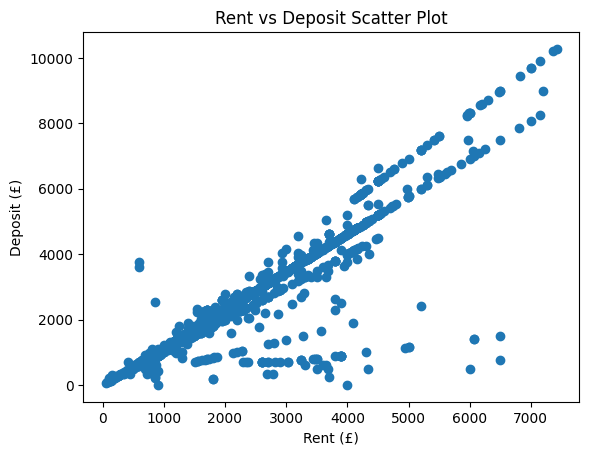

In [ ]:
df_rent_deposit = df[(df.rent < 7500) & (df.deposit != 0)]
plt.scatter(df_rent_deposit.rent, df_rent_deposit.deposit)
plt.xlabel('Rent (£)')
plt.ylabel('Deposit (£)')
plt.title('Rent vs Deposit Scatter Plot')
plt.show()

As expected, the deposit usually increases as the rent increases. The variables seem to be somewhat correlated. The deposit clearly amount increases when the rent increases. A lot of the time, the deposit value seems to be around the rent value. However, there are cases in which the deposit is lower or higher than the rent.

In [ ]:
# Calculating the deposit to rent ratio
df['deposit_rent_ratio'] = df['deposit'] / df['rent']

# Handling infinity values in rent_per_bedroom column (0 bedrooms)
df['deposit_rent_ratio'] = df['deposit_rent_ratio'].replace([np.inf, -np.inf, 0], np.nan)

df.head()

,address,subdistrict_code,rent,deposit,let_type,furnish_type,council_tax,property_type,bedrooms,bathrooms,avg_distance_to_nearest_station,nearest_station_count,subdistrict_code_new,rent_per_bedroom,deposit_rent_ratio
0,"Morse Close, Harefield, UB9",UB9,1200,1384,Long term,Unfurnished,Ask agent,Apartment,1,1,2.1,3,UB9,1200.0,1.153333
1,"Dolphin Square, London, SW1V",SW1V,1983,2288,Long term,"Furnished or unfurnished, landlord is flexible",Ask agent,Apartment,1,1,0.4,3,SW1V,1983.0,1.153807
2,"Warlters Road, Holloway, London, N7",N7,1800,0,Long term,Unfurnished,Ask agent,Apartment,1,1,0.5,3,N7,1800.0,NaN
3,"Rockingham Road, Uxbridge",NaN,1650,1903,Long term,Unfurnished,Ask agent,Apartment,2,1,1.6,3,UB8,825.0,1.153333
4,"Northwick Avenue, Harrow, HA3",HA3,2700,3115,Long term,Unfurnished,Ask agent,End of Terrace,3,2,0.4,3,HA3,900.0,1.153704


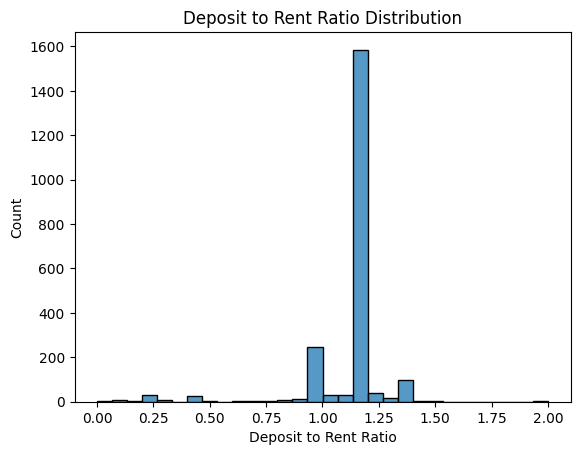

In [ ]:
# Plotting the distribution of deposit to rent ratio
sns.histplot(df[df.deposit_rent_ratio < 3].deposit_rent_ratio, bins=30)
plt.title('Deposit to Rent Ratio Distribution')
plt.xlabel('Deposit to Rent Ratio')
plt.show()

Majority of the deposit to rent ratio value seems to be just over 1.00, supporting the previous statement that the deposit is somewhat correlated to the rent price.

**What are the proportions of the different furnished types?**

In [ ]:
# Looking at the unique furnish types
furnish = df.furnish_type.value_counts().reset_index()
furnish

,furnish_type,count
0,Furnished,1969
1,Unfurnished,523
2,Ask agent,410
3,"Furnished or unfurnished, landlord is flexible",334
4,Part furnished,200


It would be cleaner to change "Furnished or unfurnished, landlord is flexible" to just "Flexible"

In [ ]:
# Changing "Furnished or unfurnished, landlord is flexible" to just "Flexible" in furnish_type
df.loc[df.furnish_type == 'Furnished or unfurnished, landlord is flexible', 'furnish_type'] = 'Flexible'

In [ ]:
# Looking at the unique furnish types
furnish = df.furnish_type.value_counts().reset_index()
furnish

,furnish_type,count
0,Furnished,1969
1,Unfurnished,523
2,Ask agent,410
3,Flexible,334
4,Part furnished,200


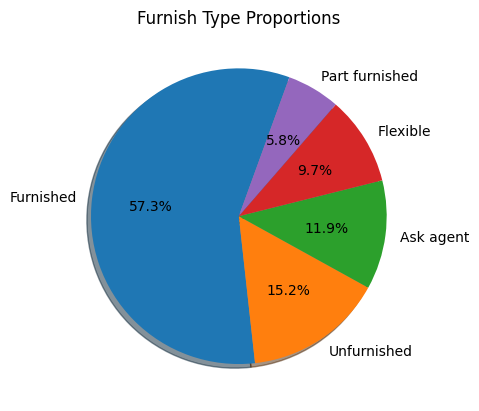

In [ ]:
# Plotting bar chart for furnish type proportions
plt.pie(furnish['count'], labels=furnish.furnish_type, autopct='%1.1f%%', labeldistance=1.1, shadow=True, startangle=70)
plt.title('Furnish Type Proportions')
plt.show()



Majority of the properties being rented are furnished

**How does the rent price vary based on the furnish type?**

In [ ]:
# Getting median rent price based on furnish type
rent_furnish = df.groupby('furnish_type')['rent'].median().reset_index().sort_values(by='rent', ascending=False)
rent_furnish

,furnish_type,rent
1,Flexible,2751.0
2,Furnished,2349.0
3,Part furnished,2300.0
0,Ask agent,2134.0
4,Unfurnished,2000.0


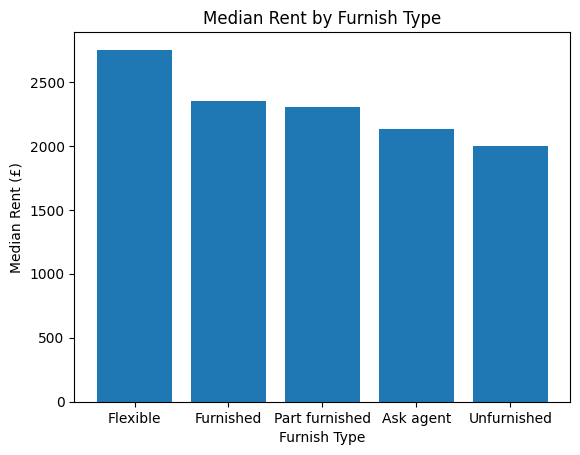

In [ ]:
# Plotting bar chart for rent by furnish type
plt.bar(rent_furnish.furnish_type, rent_furnish.rent)
plt.xlabel('Furnish Type')
plt.ylabel('Median Rent (£)')
plt.title('Median Rent by Furnish Type')
plt.show()

Surprisingly, flexible furnish type has the most expensive median rent price, followed by the furnished properties. As expected, unfurnished properties have less expensive rent prices, but the median is not too far off the furnished properties.

**How does the number of bedrooms affect rent prices?**

In [ ]:
# Grouping data by number of bedrooms and getting median price of each group
bedrooms_price = df.groupby('bedrooms')['rent'].median().reset_index()
bedrooms_price

,bedrooms,rent
0,0,150.0
1,1,1712.0
2,2,2925.0
3,3,3107.5
4,4,3500.0
5,5,4983.0
6,6,4500.0
7,7,850.0


The 7 bedroom median price is quite low which is a bit suspicious. Let's take a further look at this

In [ ]:
df[df.bedrooms == 7]

,address,subdistrict_code,rent,deposit,let_type,furnish_type,council_tax,property_type,bedrooms,bathrooms,avg_distance_to_nearest_station,nearest_station_count,subdistrict_code_new,rent_per_bedroom,deposit_rent_ratio
2222,"Watford Way, Hendon, NW4 4TR",NaN,750,865,Short or Long Term,Furnished,Ask agent,Semi-Detached,7,4,1.0,3,NW4,107.142857,1.153333
2393,"Watford Way, Hendon, NW4 4TR",NaN,850,980,Short or Long Term,Furnished,Ask agent,Semi-Detached,7,4,1.0,3,NW4,121.428571,1.152941
3122,"Princes Gate, London",NaN,78000,0,Long term,Furnished,Ask agent,Terraced,7,6,0.5,3,SW7,11142.857143,NaN


The property at Watford way seems to show the rent per person when the listing was checked online. The rent, deposit and rent_per_bedroom values for these two properties should be multiplied by 7.

In [ ]:
# Define the condition for the specific address
condition = df['address'] == 'Watford Way, Hendon, NW4 4TR'

# Update the rent, deposit, and rent_per_bedroom columns for the specified address
df.loc[condition, 'rent'] *= 7
df.loc[condition, 'deposit'] *= 7
df.loc[condition, 'rent_per_bedroom'] *= 7

In [ ]:
df[df.address == 'Watford Way, Hendon, NW4 4TR']

,address,subdistrict_code,rent,deposit,let_type,furnish_type,council_tax,property_type,bedrooms,bathrooms,avg_distance_to_nearest_station,nearest_station_count,subdistrict_code_new,rent_per_bedroom,deposit_rent_ratio
2222,"Watford Way, Hendon, NW4 4TR",NaN,5250,6055,Short or Long Term,Furnished,Ask agent,Semi-Detached,7,4,1.0,3,NW4,750.0,1.153333
2393,"Watford Way, Hendon, NW4 4TR",NaN,5950,6860,Short or Long Term,Furnished,Ask agent,Semi-Detached,7,4,1.0,3,NW4,850.0,1.152941


In [ ]:
# Grouping data by number of bedrooms and getting median price of each group
bedrooms_price = df.groupby('bedrooms')['rent'].median().reset_index()
bedrooms_price

,bedrooms,rent
0,0,150.0
1,1,1712.0
2,2,2925.0
3,3,3107.5
4,4,3500.0
5,5,4983.0
6,6,4500.0
7,7,5950.0


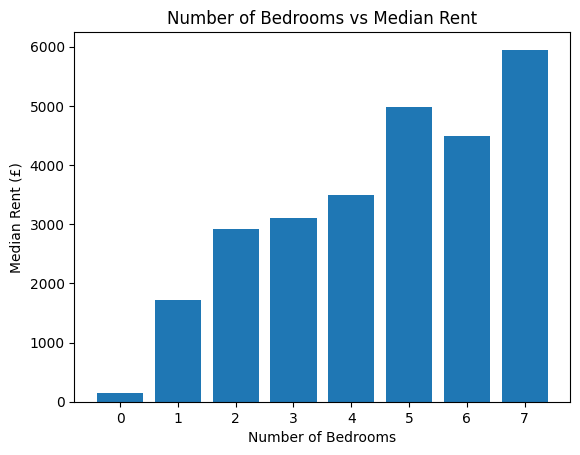

In [ ]:
# Plotting a scatter plot for number of bedrooms against median rent
plt.bar(bedrooms_price.bedrooms, bedrooms_price.rent)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Median Rent (£)')
plt.title('Number of Bedrooms vs Median Rent')
plt.show()

As expected, the rent value increases when the number of bedrooms increase. However, the median rent price for the six bedroom properties is actually less than the five bedroom properties. Let's take a look into this further

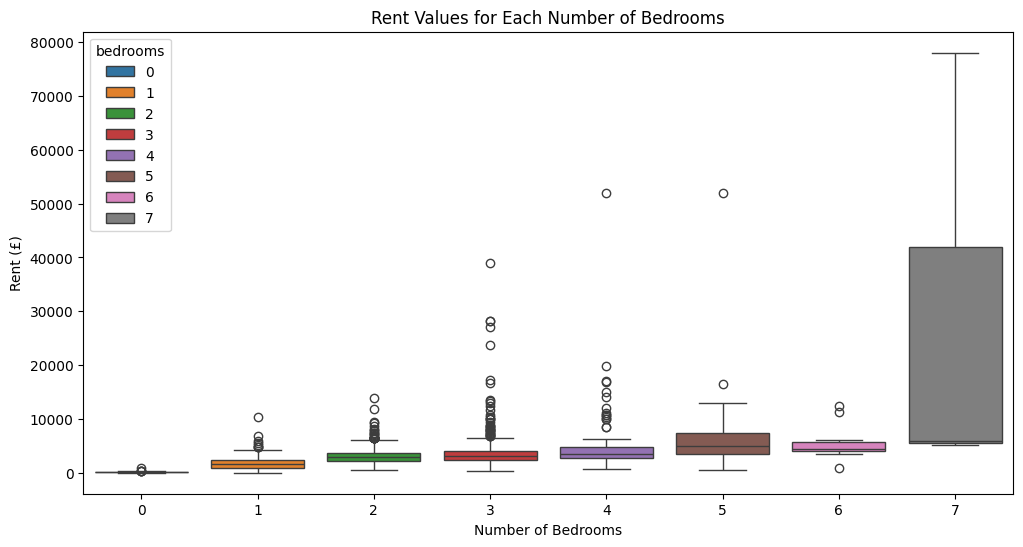

In [ ]:
# Plotting a side by side boxplot for rent values for each number of bedrooms
plt.figure(figsize=(12, 6))
sns.boxplot(x='bedrooms', y='rent', data=df, hue='bedrooms', palette='tab10')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Rent (£)')
plt.title('Rent Values for Each Number of Bedrooms')
plt.show()

The variation of rent prices 7 bedroom data seems to be too large compared to the remaining data, probably because of the category only having 3 entries. We will try filter it out in order to clearly see the remaining data.

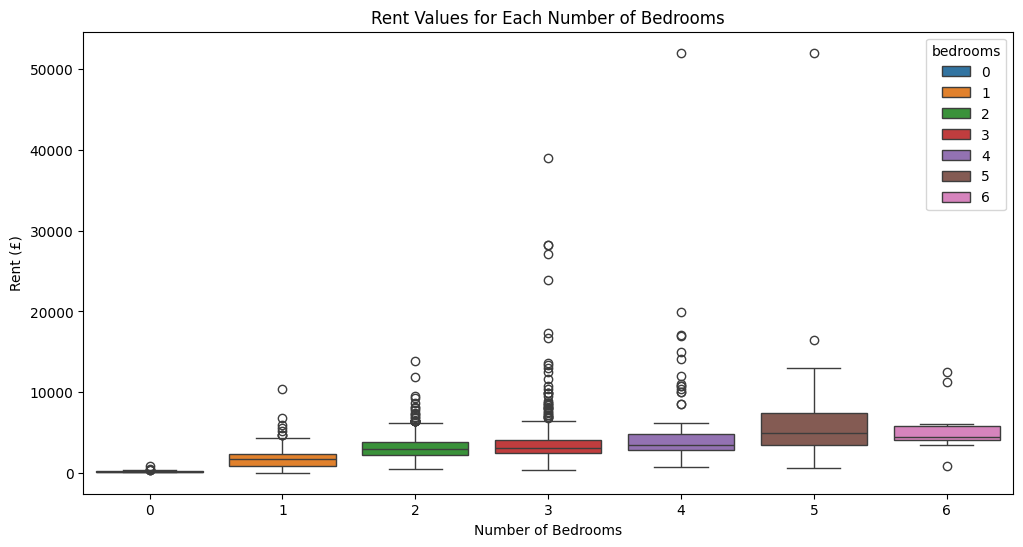

In [ ]:
# Plotting a side by side boxplot for rent values for each number of bedrooms
plt.figure(figsize=(12, 6))
sns.boxplot(x='bedrooms', y='rent', data=df[df.bedrooms != 7], hue='bedrooms', palette='tab10')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Rent (£)')
plt.title('Rent Values for Each Number of Bedrooms')
plt.show()

It is still quite difficult to see the body of the boxplot due to the extreme outliers. We will try filter these out too.

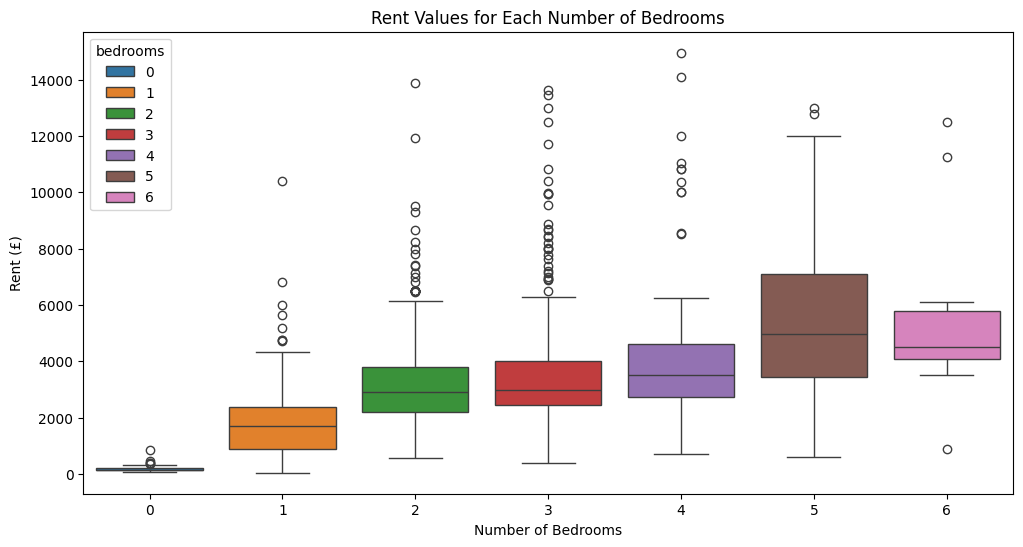

In [ ]:
# Plotting a side by side boxplot for rent values for each number of bedrooms
plt.figure(figsize=(12, 6))
sns.boxplot(x='bedrooms', y='rent', data=df[(df.bedrooms != 7) & (df.rent < 15000)], hue='bedrooms', palette='tab10')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Rent (£)')
plt.title('Rent Values for Each Number of Bedrooms')
plt.show()

It does indeed seem like the five bedroom median price is higher than the 6 bedroom. Based on the initial box plot, it does also look like there are five bedroom properties which are much more expensive, and that there are much less six bedroom properties compared to five bedroom properties.

Based on the the boxplots, while it does seem that the rent price increases when the number of bedrooms increase, there are still overlapping between boxes, indicating the number of bedrooms might not be the main factor influencing the rent price.

In [ ]:
# Counting number of properties based on the number of bedrooms
df.bedrooms.value_counts()

,count
bedrooms,
1,1763
2,1170
3,316
4,97
0,45
5,30
6,12
7,3


**What is the average commute distance to the nearest train station?**

In [ ]:
# Calculating average commute distance overall
commute_distance = df.avg_distance_to_nearest_station.mean()
print(f'Average commute distance to the nearest train station: {round(commute_distance, 3)}km')

Average commute distance to the nearest train station: 0.495km


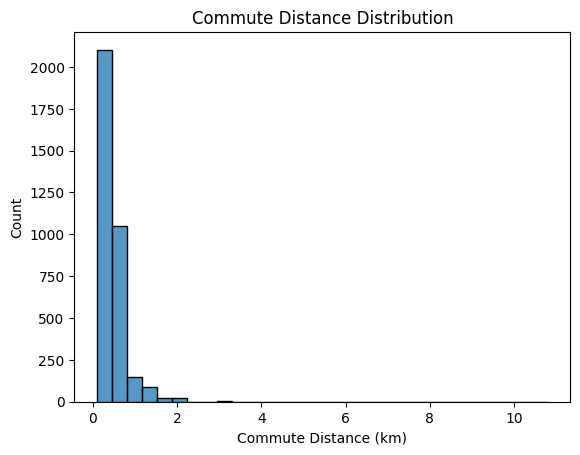

In [ ]:
# Visualising the distribution of commute distances using a histogram
sns.histplot(df.avg_distance_to_nearest_station, bins=30)
plt.title('Commute Distance Distribution')
plt.xlabel('Commute Distance (km)')
plt.show()

The data is very left skewed with some extreme outliers at 10km. Shorter commute distances to train stations are actually quite valuable, so this left-skewness is usually a good sign.

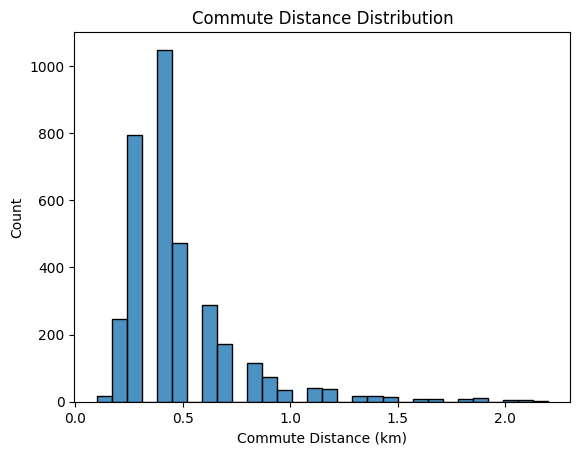

In [ ]:
# Looking at the distribution for commute distances under 3km
sns.histplot(df[df.avg_distance_to_nearest_station < 3].avg_distance_to_nearest_station, bins=30, alpha=.8)
plt.title('Commute Distance Distribution')
plt.xlabel('Commute Distance (km)')
plt.show()

Majority of properties seem to be within 500 metres of a train station, which is highly desirable in a city like London.

**How does the average distance to the nearest station affect rent price?**

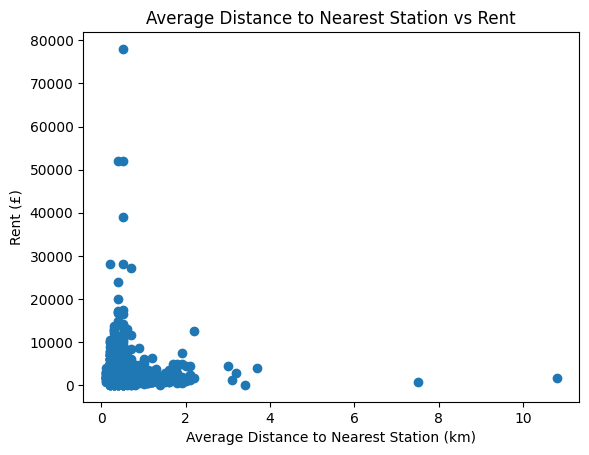

In [ ]:
# Plotting a scatter plot of average distance to nearest station to rent price
plt.scatter(df.avg_distance_to_nearest_station, df.rent)
plt.xlabel('Average Distance to Nearest Station (km)')
plt.ylabel('Rent (£)')
plt.title('Average Distance to Nearest Station vs Rent')
plt.show()

The data is quite messy due to most data being clustered in the lower left portion. It might be a good idea to filter out the outlier values to focus more on the larger portion of the data.

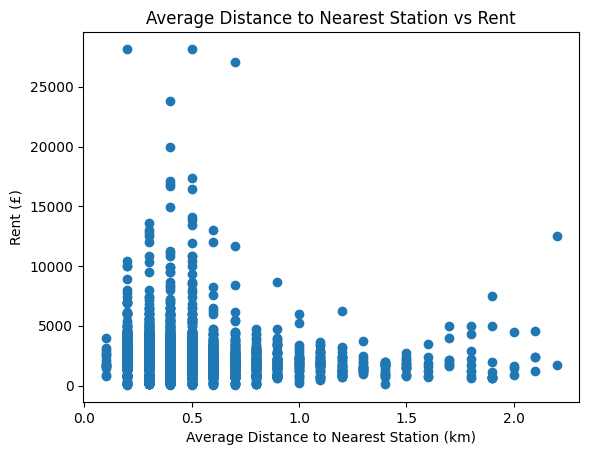

In [ ]:
# Plotting a scatter plot of average distance to nearest station to rent price
df_filtered = df[(df.avg_distance_to_nearest_station < 3) & (df.rent < 30000)]
plt.scatter(df_filtered.avg_distance_to_nearest_station, df_filtered.rent)
plt.xlabel('Average Distance to Nearest Station (km)')
plt.ylabel('Rent (£)')
plt.title('Average Distance to Nearest Station vs Rent')
plt.show()

Upon closer inspection, the average distance variable is a categorical variable rather than a quantitative one.

Text(0, 0.5, 'Rent (£)')

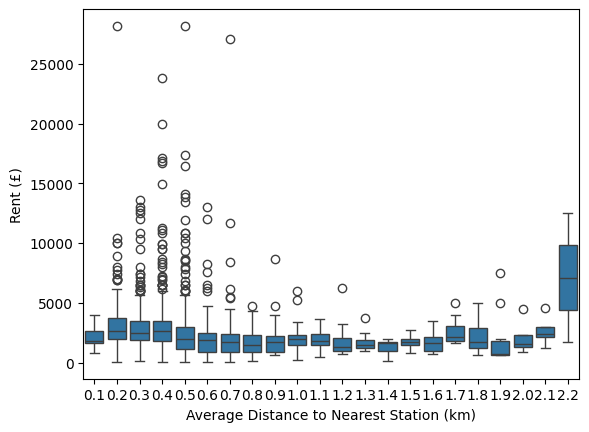

In [ ]:
# Plotting a box plot of average distance to nearest station to rent price
sns.boxplot(x='avg_distance_to_nearest_station', y='rent', data=df_filtered)
plt.xlabel('Average Distance to Nearest Station (km)')
plt.ylabel('Rent (£)')

There doesn't seem to be much of an association between the two variables. If anything, there are properties closer to a station that tend to be more expensive, which is counterintuitive.

This might be due to the fact that majority of properties are within 500 metres of a station, so there might not be a major effect on the rent price, if any.

**How do rent prices vary across different property types?**

In [ ]:
# Showing the unique property types and how many observatiions per type
df.property_type.value_counts()

,count
property_type,
Flat,1260
Apartment,1034
House Share,315
Studio,258
Terraced,86
Parking,83
House,79
Flat Share,75
Semi-Detached,59


Flats and Apartments seem to make up most of the listings, followed by House Shares, Studios and Terraced properties. It could be worth looking at these top 10 categories using a boxplot

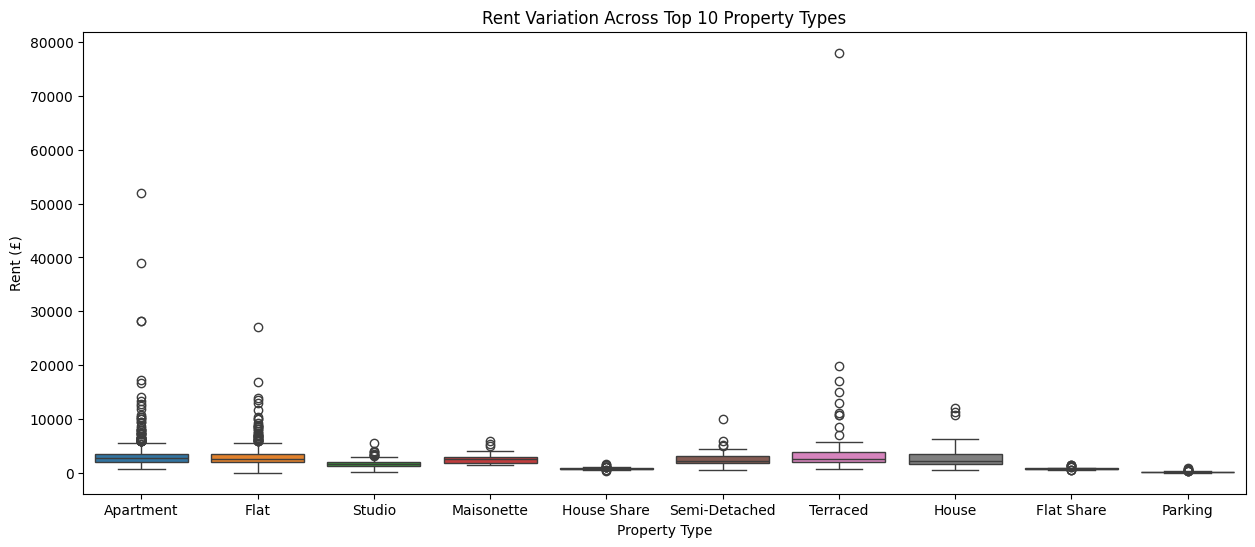

In [ ]:
# Making box plots for rent variation across top 10 property types
df_top10 = df[df.property_type.isin(['Flat', 'Apartment', 'House Share', 'Studio', 'Terraced', 'Parking', 'House', 'Flat Share', 'Semi-Detached', 'Maisonette'])]
plt.figure(figsize=(15, 6))
sns.boxplot(x='property_type', y='rent', data=df_top10, hue='property_type', palette='tab10')
plt.title('Rent Variation Across Top 10 Property Types')
plt.xlabel('Property Type')
plt.ylabel('Rent (£)')
plt.show()

There seems to be some extreme outliers. which flatten the box plot. We will remove them to better show the body of the boxplot

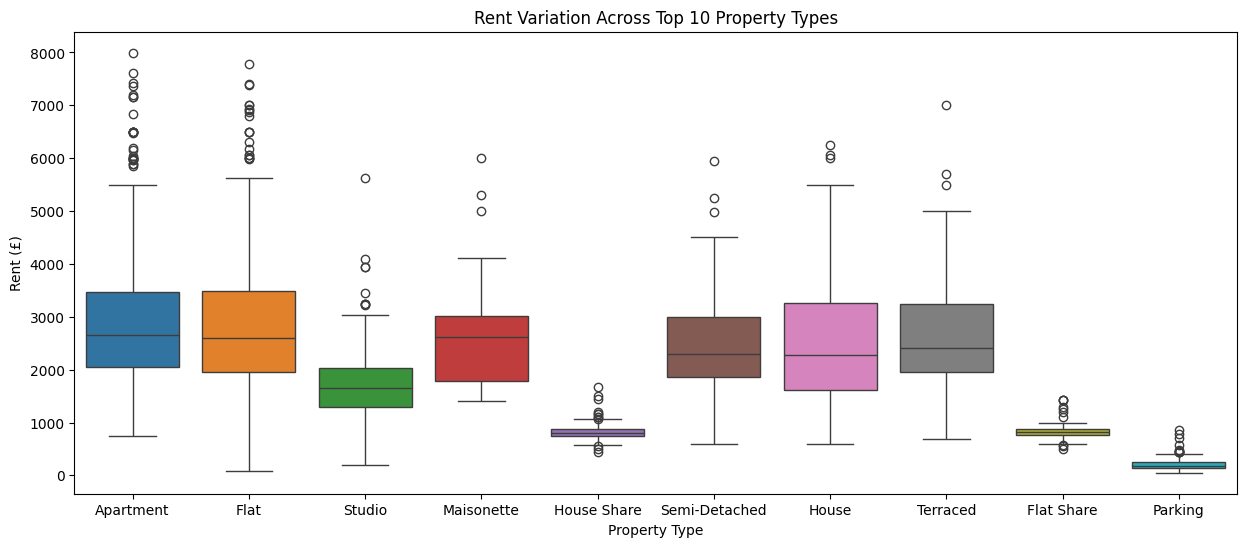

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='property_type', y='rent', data=df_top10[df_top10.rent < 8000], hue='property_type', palette='tab10')
plt.title('Rent Variation Across Top 10 Property Types')
plt.xlabel('Property Type')
plt.ylabel('Rent (£)')
plt.show()

Apartments and Flats tend to be more expensive and also have the largest variation in prices while house and flat shares tend to be the least expensive (not accounting for parking spaces) . Houses, semi-detached and terraced properties could be less expensive due to the fact these properties are more common on the outskirts of London, while apartments and flats are more common closer to the centre.

Studios tend to be less expensive but keep in mind that they are only meant for one person. If we take the rent per bedroom, studios might be one of the most expensive categories.

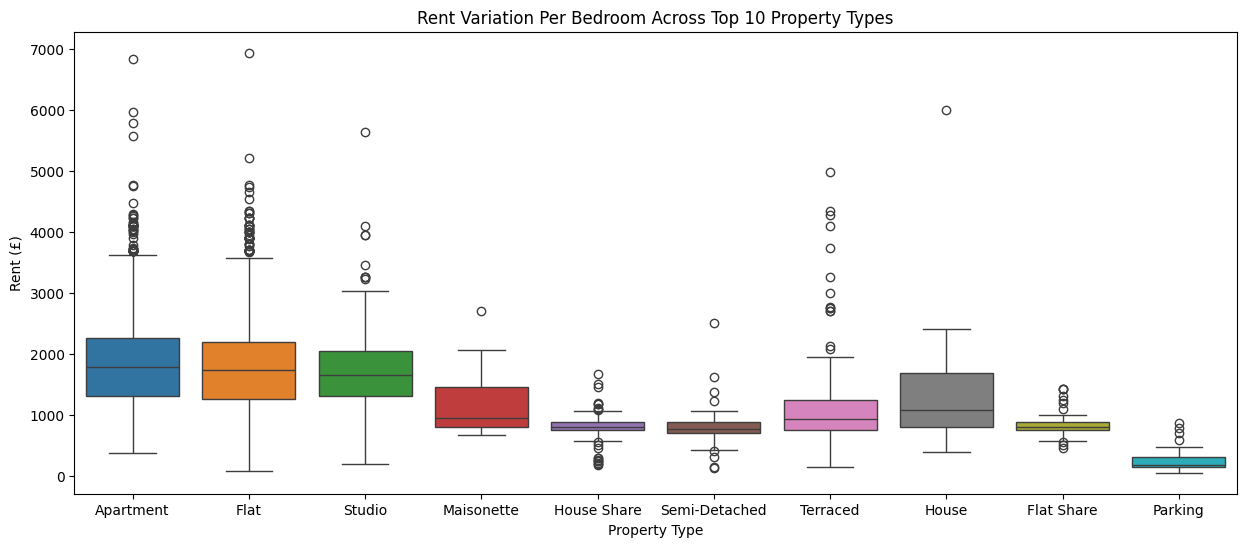

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='property_type', y='rent_per_bedroom', data=df_top10[df_top10.rent_per_bedroom < 8000], hue='property_type', palette='tab10')
plt.title('Rent Variation Per Bedroom Across Top 10 Property Types')
plt.xlabel('Property Type')
plt.ylabel('Rent (£)')
plt.show()

As seen in the figure above, the rent price bedroom of an apartment and flat is around the same of a studio. All three categories tend to be on the more expensive side.

Houses, house shares, flat shares, semi-detached and terraced properties tend to be less expensive which could be due to location and amenities.

However, there is quite a bit of overlap between categories so the two variables might not be too correlated.

In [ ]:
df.head()

,address,subdistrict_code,rent,deposit,let_type,furnish_type,council_tax,property_type,bedrooms,bathrooms,avg_distance_to_nearest_station,nearest_station_count,subdistrict_code_new,rent_per_bedroom,deposit_rent_ratio
0,"Morse Close, Harefield, UB9",UB9,1200,1384,Long term,Unfurnished,Ask agent,Apartment,1,1,2.1,3,UB9,1200.0,1.153333
1,"Dolphin Square, London, SW1V",SW1V,1983,2288,Long term,Flexible,Ask agent,Apartment,1,1,0.4,3,SW1V,1983.0,1.153807
2,"Warlters Road, Holloway, London, N7",N7,1800,0,Long term,Unfurnished,Ask agent,Apartment,1,1,0.5,3,N7,1800.0,NaN
3,"Rockingham Road, Uxbridge",NaN,1650,1903,Long term,Unfurnished,Ask agent,Apartment,2,1,1.6,3,UB8,825.0,1.153333
4,"Northwick Avenue, Harrow, HA3",HA3,2700,3115,Long term,Unfurnished,Ask agent,End of Terrace,3,2,0.4,3,HA3,900.0,1.153704


In [ ]:
# Exporting final dataframe
#df.to_csv('/content/gdrive/My Drive/Imran/Education/PersonalDevelopment/CodeCademy-DataScience/PortfolioProjects/CapstoneProject/rent_ads_rightmove_extended_clean_finished.csv', index=False)

##**Conclusion**

Through an extensive exploratory data analysis (EDA) of the London housing market, several key insights were uncovered, shedding light on the factors influencing rental prices and property characteristics in various subdistricts:

- Property Listings: The analysis identified the top 10 subdistricts with the highest number of rental listings, providing a clearer picture of the most active areas in the rental market.

- Rent Price Variation: Rent prices were found to vary significantly across subdistricts, with the median rent price offering a benchmark for comparisons. Additionally, the variation in rent prices across different property types and furnishing statuses highlighted the importance of these factors in rental decisions.

- Furnishing Impact: The proportion of furnished, unfurnished, and semi-furnished properties was analyzed, revealing trends in tenant preferences. Furnished properties generally commanded higher rent prices, suggesting a premium associated with convenience.

- Bedrooms and Rent: A direct correlation was observed between the number of bedrooms and rent prices, with larger properties naturally commanding higher rents. This relationship is critical for understanding how property size impacts rental affordability.

- Deposit and Rent Correlation: The analysis also explored how deposit amounts vary with rent prices, providing insights into the upfront costs tenants might expect in different areas.

- Commute and Accessibility: The average commute distance to the nearest train station was examined, offering valuable information for renters prioritizing proximity to public transportation.

In conclusion, the insights derived from this EDA can guide prospective renters and real estate investors in making informed decisions. Understanding the dynamics of rent pricing, property characteristics, and location can help tailor strategies to maximize value, whether in choosing a rental property or investing in real estate. The findings also underscore the importance of considering multiple factors, such as furnishing, property type, and location, in assessing the London rental market.